# Imports

In [189]:
import matplotlib.pyplot as plt
import numpy as np
import mini_keras as mk

# Cas de tests, rendu 2

## Classification

### Linear Simple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [190]:
X = np.array([
      [1, 1],
      [2, 3],
      [3, 3]
])
Y = np.array([
      1,
      -1,
      -1
])

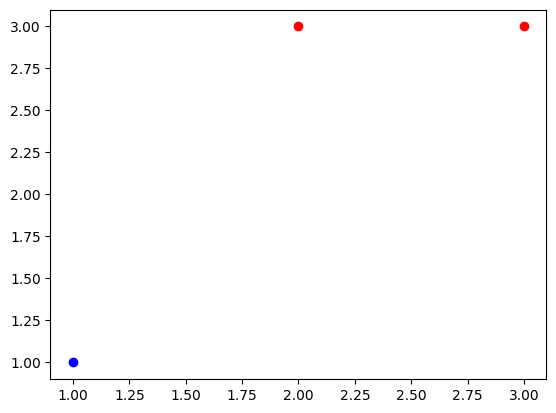

<Figure size 640x480 with 0 Axes>

In [191]:
plt.scatter(X[0, 0], X[0, 1], color='blue')
plt.scatter(X[1:3,0], X[1:3,1], color='red')
plt.show()
plt.clf()

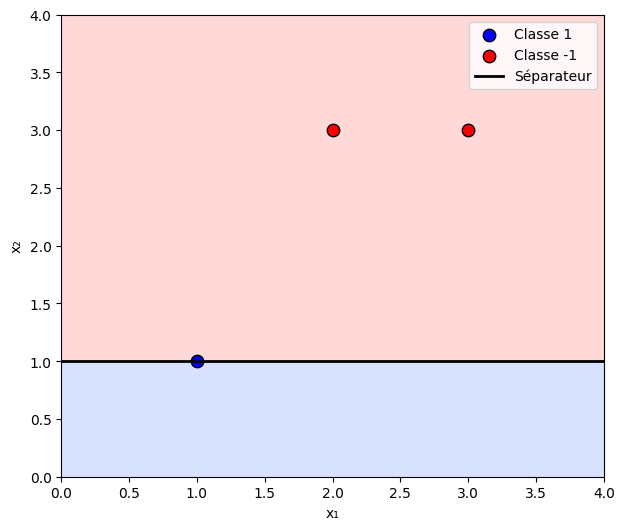

In [192]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([
    [1, 1],
    [2, 3],
    [3, 3]
])
Y = np.array([1, -1, -1])

model = mk.LinearClassification()
model.fit(X.tolist(), Y.tolist())
w0, w1, w2 = model.get_weights()

xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 300),
    np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 300)
)
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = np.array([model.predict(point.tolist()) for point in grid_points])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(7, 6))
plt.contourf(xx, yy, Z, levels=[-2, 0, 2], colors=['#ffb3b3', '#b3c6ff'], alpha=0.5)

plt.scatter(X[Y == 1, 0], X[Y == 1, 1], color='blue', label='Classe 1', edgecolor='k', s=80)
plt.scatter(X[Y == -1, 0], X[Y == -1, 1], color='red', label='Classe -1', edgecolor='k', s=80)

x_plot = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
if w2 != 0:
    y_plot = -(w0 + w1 * x_plot) / w2
    plt.plot(x_plot, y_plot, 'k-', lw=2, label='Séparateur')
else:
    plt.axvline(-w0 / w1, color='k', linestyle='-', lw=2, label='Séparateur vertical')

plt.legend()
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
plt.show()


### MLP

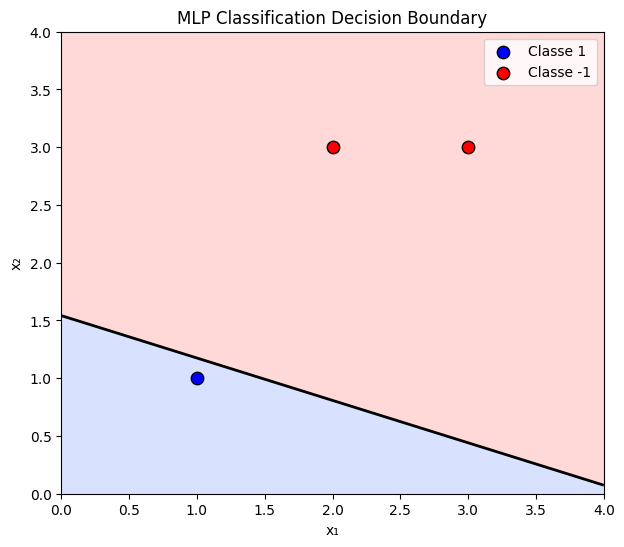

In [193]:

X = np.array([
    [1, 1],
    [2, 3],
    [3, 3]
])
Y = np.array([
    [1], 
    [-1.0], 
    [-1.0]
])

mlp = mk.MLP(
    layers=[2, 2, 1],
    is_classification=True,
    activations=['linear', 'sigmoid'],
)

history = mlp.fit(
    x_train=X,
    y_train=Y,
    x_test=X,
    y_test=Y,
    epochs=1000,
    lr=0.01,
)

Y = Y.flatten()





# Create a meshgrid for plotting decision boundary
xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 300),
    np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 300)
)
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Get predictions from the MLP model
# For classification with sigmoid, we need to convert sigmoid output to class predictions
raw_predictions = np.array([mlp.predict(point.tolist()) for point in grid_points])
# Convert sigmoid outputs (0-1) to class predictions (-1/+1)
# If sigmoid output > 0.5, predict class 1, otherwise predict class -1
Z = np.where(raw_predictions > 0.5, 1, -1)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(7, 6))
plt.contourf(xx, yy, Z, levels=[-2, 0, 2], colors=['#ffb3b3', '#b3c6ff'], alpha=0.5)

plt.scatter(X[Y == 1, 0], X[Y == 1, 1], color='blue', label='Classe 1', edgecolor='k', s=80)
plt.scatter(X[Y == -1, 0], X[Y == -1, 1], color='red', label='Classe -1', edgecolor='k', s=80)

# Add decision boundary contour (where sigmoid output = 0.5)
raw_predictions_grid = np.array([mlp.predict(point.tolist()) for point in grid_points])
Z_raw = raw_predictions_grid.reshape(xx.shape)
plt.contour(xx, yy, Z_raw, levels=[0.5], colors='black', linewidths=2, linestyles='-')

plt.legend()
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.title("MLP Classification Decision Boundary")
plt.xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
plt.show()

### Linear Multiple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [194]:
X = np.concatenate([np.random.random((50,2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])])
Y = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * -1.0])

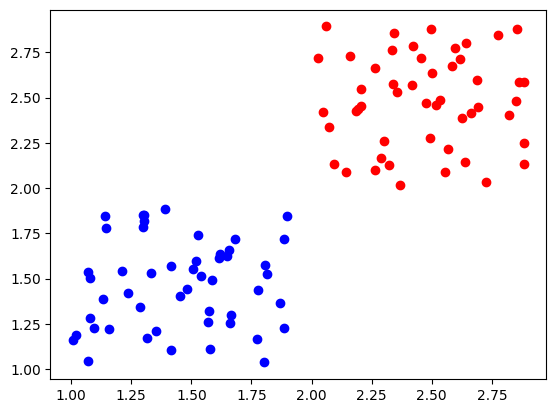

<Figure size 640x480 with 0 Axes>

In [195]:
plt.scatter(X[0:50, 0], X[0:50, 1], color='blue')
plt.scatter(X[50:100,0], X[50:100,1], color='red')
plt.show()
plt.clf()

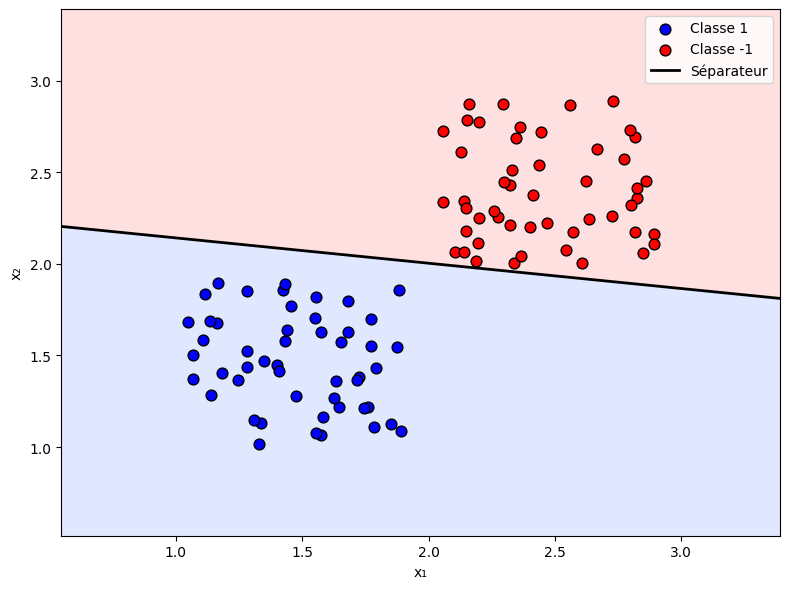

In [196]:
# np.random.seed(0)
X = np.concatenate([
    np.random.random((50, 2)) * 0.9 + np.array([1, 1]),
    np.random.random((50, 2)) * 0.9 + np.array([2, 2])
])
Y = np.concatenate([
    np.ones((50, 1)),
    -np.ones((50, 1))
]).ravel()

model = mk.LinearClassification()
model.fit(X.tolist(), Y.tolist())
w0, w1, w2 = model.get_weights()

xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 300),
    np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 300)
)
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = np.array([model.predict(point.tolist()) for point in grid_points])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, levels=[-2, 0, 2], colors=['#ffb3b3', '#b3c6ff'], alpha=0.4)

plt.scatter(X[0:50, 0], X[0:50, 1], color='blue', edgecolor='k', s=60, label='Classe 1')
plt.scatter(X[50:100, 0], X[50:100, 1], color='red', edgecolor='k', s=60, label='Classe -1')

x_plot = np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 100)
if w2 != 0:
    y_plot = -(w0 + w1 * x_plot) / w2
    plt.plot(x_plot, y_plot, 'k-', lw=2, label='Séparateur')
else:
    plt.axvline(-w0 / w1, color='k', linestyle='-', lw=2, label='Séparateur vertical')

plt.legend()
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.xlim(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5)
plt.ylim(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5)
plt.tight_layout()
plt.show()

### MLP Linear Multiple

[[1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 ...
 [1.38208829e-21]
 [1.16075356e-21]
 [9.74864518e-22]]


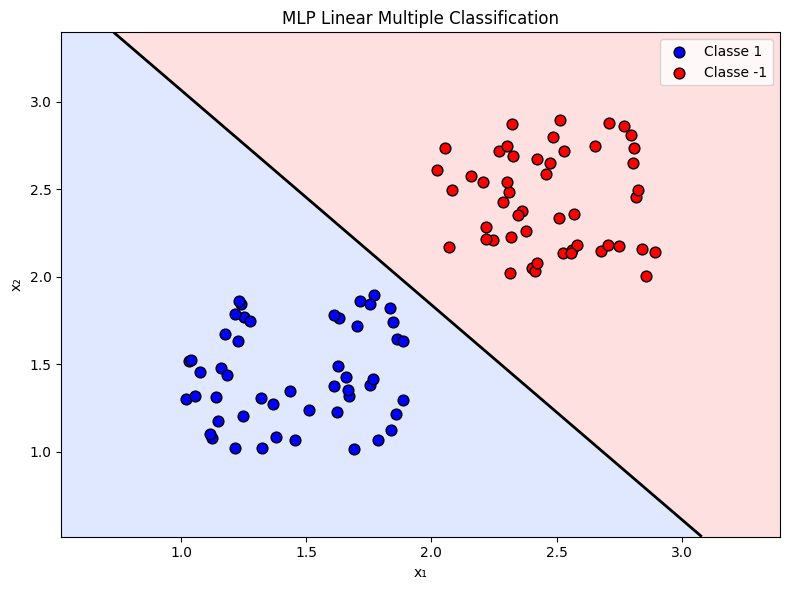

In [197]:
X = np.concatenate([
    np.random.random((50, 2)) * 0.9 + np.array([1, 1]),
    np.random.random((50, 2)) * 0.9 + np.array([2, 2])
])
Y = np.concatenate([
    np.ones((50, 1)),
    -np.ones((50, 1))
]).ravel()



Y = Y.reshape(-1, 1)  # Reshape Y to be a 2D array with one column
# print(Y)

# Create MLP model
mlp = mk.MLP(
    layers=[2, 2, 1],
    is_classification=True,
    activations=['linear', 'sigmoid'],
)

# Train the MLP
history = mlp.fit(
    x_train=X,
    y_train=Y,
    x_test=X,
    y_test=Y,
    epochs=10000,
    lr=0.01,
)

# Create visualization
xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 300),
    np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 300)
)
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Get predictions from the MLP model
raw_predictions = np.array([mlp.predict(point.tolist()) for point in grid_points])
print(raw_predictions)
# Convert sigmoid outputs (0-1) to class predictions (-1/+1)
Z = np.where(raw_predictions > 0.5, 1, -1)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, levels=[-2, 0, 2], colors=['#ffb3b3', '#b3c6ff'], alpha=0.4)

plt.scatter(X[0:50, 0], X[0:50, 1], color='blue', edgecolor='k', s=60, label='Classe 1')
plt.scatter(X[50:100, 0], X[50:100, 1], color='red', edgecolor='k', s=60, label='Classe -1')

# Add decision boundary contour (where sigmoid output = 0.5)
raw_predictions_grid = np.array([mlp.predict(point.tolist()) for point in grid_points])
Z_raw = raw_predictions_grid.reshape(xx.shape)
plt.contour(xx, yy, Z_raw, levels=[0.5], colors='black', linewidths=2, linestyles='-')

plt.legend()
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.title("MLP Linear Multiple Classification")
plt.xlim(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5)
plt.ylim(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5)
plt.tight_layout()
plt.show()

### XOR :
        Linear Model    : KO
        MLP (2, 2, 1)   : OK

In [198]:
X = np.array([[1, 0], [0, 1], [0, 0], [1, 1]])
Y = np.array([1, 1, -1, -1])

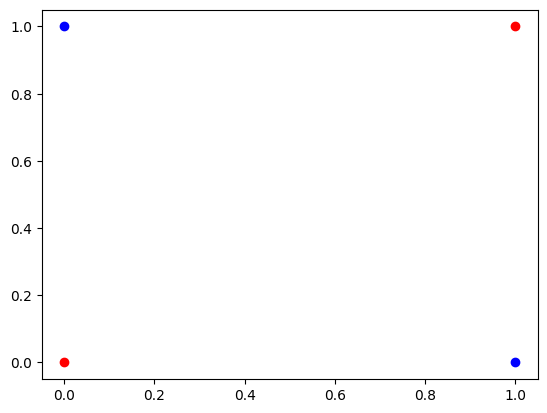

<Figure size 640x480 with 0 Axes>

In [199]:
plt.scatter(X[0:2, 0], X[0:2, 1], color='blue')
plt.scatter(X[2:4,0], X[2:4,1], color='red')
plt.show()
plt.clf()

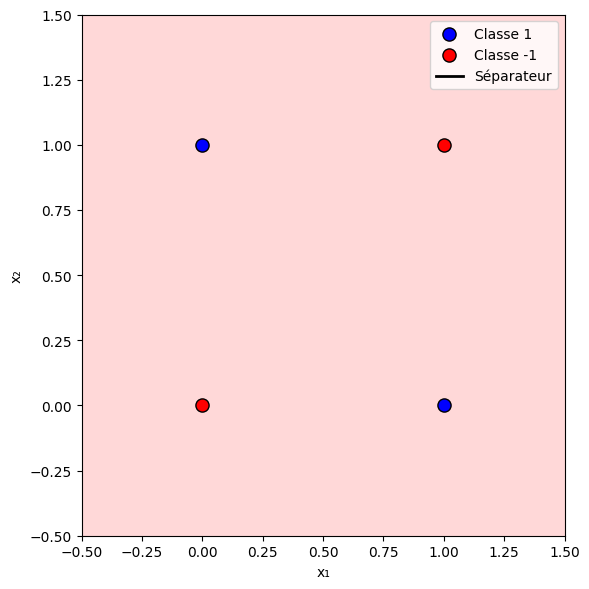

In [200]:
X = np.array([[1, 0], [0, 1], [0, 0], [1, 1]])
Y = np.array([1, 1, -1, -1])

model = mk.LinearClassification(max_iterations=10000, verbose=True)
model.fit(X.tolist(), Y.tolist())
w0, w1, w2 = model.get_weights()

xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 200),
    np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 200)
)
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = np.array([model.predict(point.tolist()) for point in grid_points])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(6, 6))
plt.contourf(xx, yy, Z, levels=[-2, 0, 2], colors=['#ffb3b3', '#b3c6ff'], alpha=0.5)

plt.scatter(X[0:2, 0], X[0:2, 1], color='blue', edgecolor='k', s=90, label='Classe 1')
plt.scatter(X[2:4, 0], X[2:4, 1], color='red', edgecolor='k', s=90, label='Classe -1')

x_plot = np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 100)
if w2 != 0:
    y_plot = -(w0 + w1 * x_plot) / w2
    plt.plot(x_plot, y_plot, 'k-', lw=2, label='Séparateur')
else:
    plt.axvline(-w0 / w1, color='k', linestyle='-', lw=2, label='Séparateur vertical')

plt.legend()
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.xlim(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5)
plt.ylim(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5)
plt.tight_layout()
plt.show()


### MLP XOR

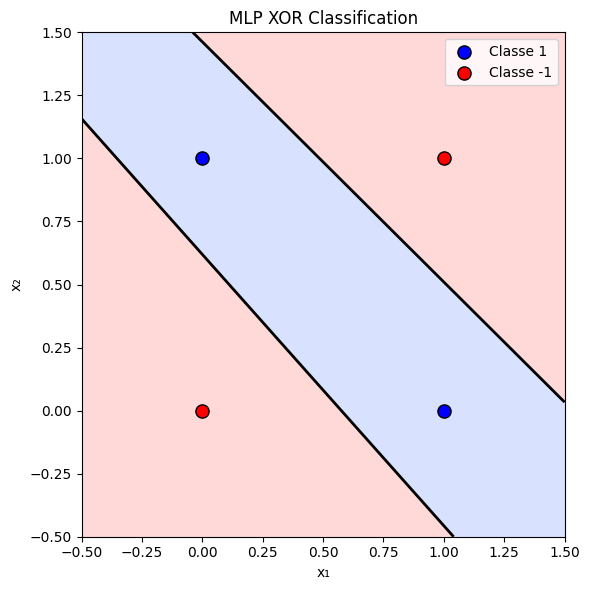

In [201]:
X = np.array([[1, 0], [0, 1], [0, 0], [1, 1]])
Y = np.array([1, 1, 0, 0])
Y = Y.reshape(-1, 1)  # Reshape Y to be a 2D array with one column

# Create MLP model with architecture [2, 2, 1] and activations [linear, sigmoid, sigmoid]
mlp = mk.MLP(
    layers=[2, 2, 2, 1],
    is_classification=True,
    activations=['linear', 'sigmoid', 'sigmoid']  # Use sigmoid for output layer to get probabilities,
)

# Train the MLP
history = mlp.fit(
    x_train=X,
    y_train=Y,
    x_test=X,
    y_test=Y,
    epochs=100_000,
    lr=0.01,
)



# Create visualization
xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 200),
    np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 200)
)
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Get predictions from the MLP model
raw_predictions = np.array([mlp.predict(point.tolist()) for point in grid_points])
# Convert sigmoid outputs (0-1) to class predictions (-1/+1)
Z = np.where(raw_predictions > 0.5, 1, -1)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(6, 6))
plt.contourf(xx, yy, Z, levels=[-2, 0, 2], colors=['#ffb3b3', '#b3c6ff'], alpha=0.5)

plt.scatter(X[0:2, 0], X[0:2, 1], color='blue', edgecolor='k', s=90, label='Classe 1')
plt.scatter(X[2:4, 0], X[2:4, 1], color='red', edgecolor='k', s=90, label='Classe -1')

# Add decision boundary contour (where sigmoid output = 0.5)
raw_predictions_grid = np.array([mlp.predict(point.tolist()) for point in grid_points])
Z_raw = raw_predictions_grid.reshape(xx.shape)
plt.contour(xx, yy, Z_raw, levels=[0.5], colors='black', linewidths=2, linestyles='-')

plt.legend()
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.title("MLP XOR Classification")
plt.xlim(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5)
plt.ylim(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5)
plt.tight_layout()
plt.show()

## Cross
### Linear

In [202]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X])

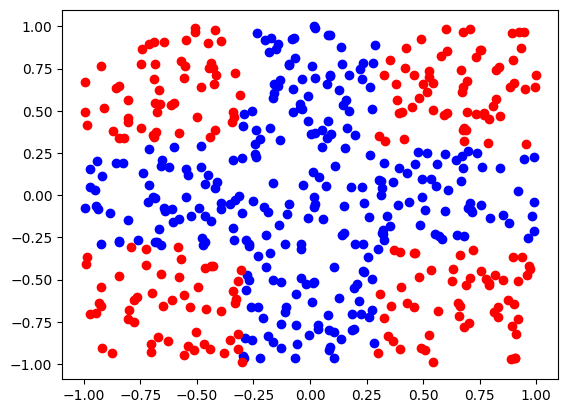

<Figure size 640x480 with 0 Axes>

In [203]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,1], color='red')
plt.show()
plt.clf()

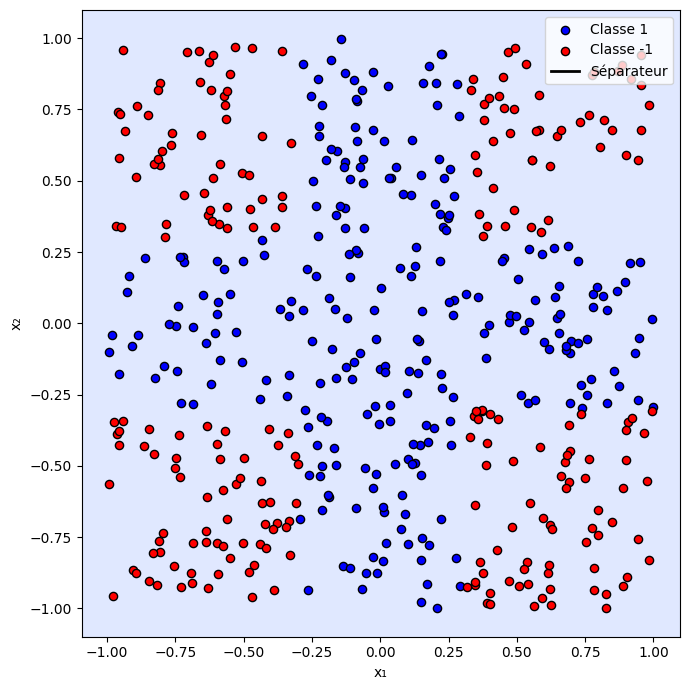

In [204]:
# np.random.seed(0)
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X])

model = mk.LinearClassification(verbose=True, max_iterations=10000)
model.fit(X.tolist(), Y.tolist())
w0, w1, w2 = model.get_weights()

xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min() - 0.1, X[:, 0].max() + 0.1, 300),
    np.linspace(X[:, 1].min() - 0.1, X[:, 1].max() + 0.1, 300)
)
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = np.array([model.predict(point.tolist()) for point in grid_points])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(7, 7))
plt.contourf(xx, yy, Z, levels=[-2, 0, 2], colors=['#ffb3b3', '#b3c6ff'], alpha=0.4)

plt.scatter(X[Y == 1, 0], X[Y == 1, 1], color='blue', edgecolor='k', s=35, label='Classe 1')
plt.scatter(X[Y == -1, 0], X[Y == -1, 1], color='red', edgecolor='k', s=35, label='Classe -1')

x_plot = np.linspace(X[:, 0].min() - 0.1, X[:, 0].max() + 0.1, 100)
if w2 != 0:
    y_plot = -(w0 + w1 * x_plot) / w2
    plt.plot(x_plot, y_plot, 'k-', lw=2, label='Séparateur')
else:
    plt.axvline(-w0 / w1, color='k', linestyle='-', lw=2, label='Séparateur vertical')

plt.legend()
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.xlim(X[:, 0].min() - 0.1, X[:, 0].max() + 0.1)
plt.ylim(X[:, 1].min() - 0.1, X[:, 1].max() + 0.1)
plt.tight_layout()
plt.show()


### MLP Cross

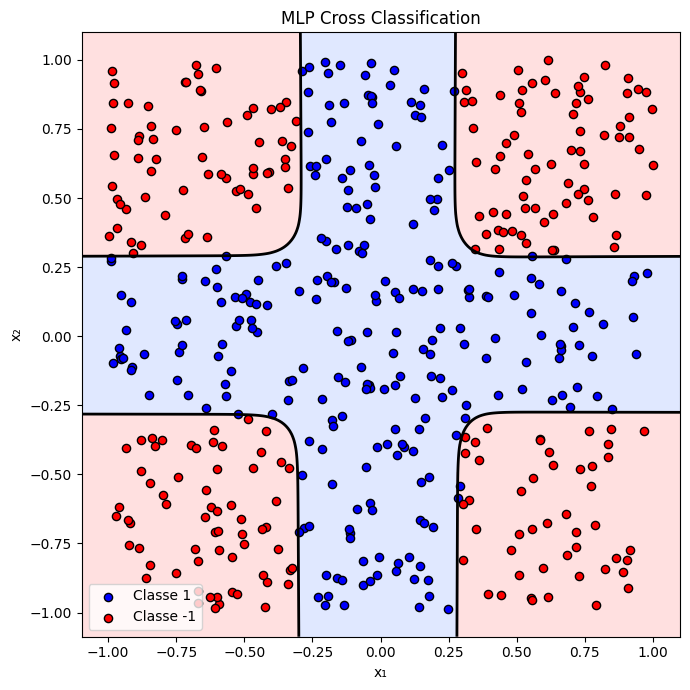

In [205]:
# np.random.seed(0)
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X])
Y = Y.reshape(-1, 1)  # Reshape Y to be a 2D array with one column

# Create MLP model for cross classification
# Use [2, 4, 1] architecture as suggested in the comment
mlp = mk.MLP(
    layers=[2, 4, 1],
    is_classification=True,
    activations=[ 'sigmoid', 'sigmoid'],
)

# Train the MLP
history = mlp.fit(
    x_train=X,
    y_train=Y,
    x_test=X,
    y_test=Y,
    epochs=10000,
    lr=0.01,
)
Y = Y.flatten()  # Flatten Y to 1D for visualization

# Create visualization
xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min() - 0.1, X[:, 0].max() + 0.1, 300),
    np.linspace(X[:, 1].min() - 0.1, X[:, 1].max() + 0.1, 300)
)
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Get predictions from the MLP model
raw_predictions = np.array([mlp.predict(point.tolist()) for point in grid_points])
# Convert sigmoid outputs (0-1) to class predictions (-1/+1)
Z = np.where(raw_predictions > 0.5, 1, -1)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(7, 7))
plt.contourf(xx, yy, Z, levels=[-2, 0, 2], colors=['#ffb3b3', '#b3c6ff'], alpha=0.4)

plt.scatter(X[Y == 1, 0], X[Y == 1, 1], color='blue', edgecolor='k', s=35, label='Classe 1')
plt.scatter(X[Y == -1, 0], X[Y == -1, 1], color='red', edgecolor='k', s=35, label='Classe -1')

# Add decision boundary contour (where sigmoid output = 0.5)
raw_predictions_grid = np.array([mlp.predict(point.tolist()) for point in grid_points])
Z_raw = raw_predictions_grid.reshape(xx.shape)
plt.contour(xx, yy, Z_raw, levels=[0.5], colors='black', linewidths=2, linestyles='-')

plt.legend()
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.title("MLP Cross Classification")
plt.xlim(X[:, 0].min() - 0.1, X[:, 0].max() + 0.1)
plt.ylim(X[:, 1].min() - 0.1, X[:, 1].max() + 0.1)
plt.tight_layout()
plt.show()

### Multi Linear 3 classes :
        Linear Model x3 : OK
        MLP (2, 3)      : OK

In [206]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([
    [1, 0, 0] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else
    [0, 1, 0] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else
    [0, 0, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else
    [0, 0, 0] for p in X
])

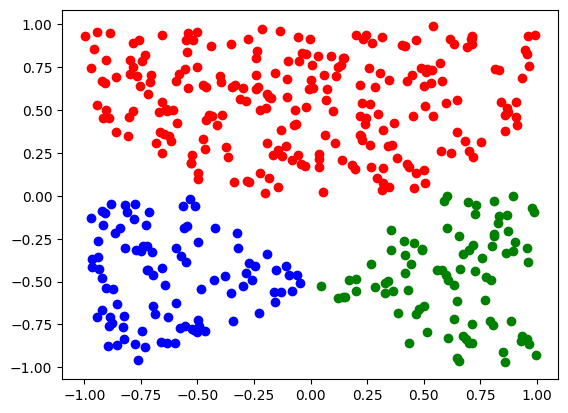

<Figure size 640x480 with 0 Axes>

In [207]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

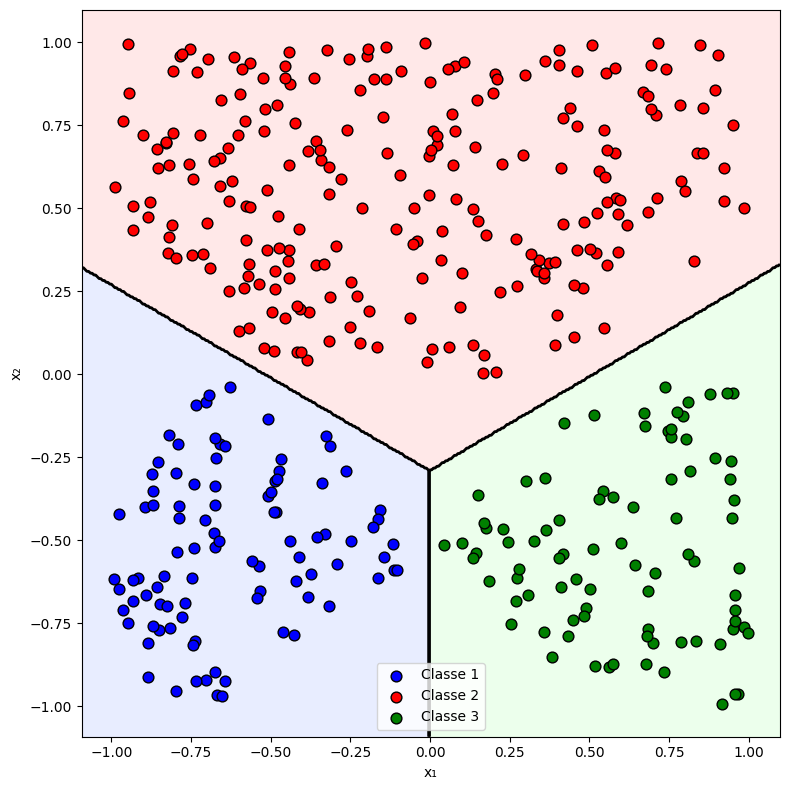

In [208]:
# np.random.seed(0)
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([
    [1, 0, 0] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else
    [0, 1, 0] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else
    [0, 0, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else
    [0, 0, 0] for p in X
])
mask = ~np.all(Y == [0, 0, 0], axis=1)
X = X[mask]
Y = Y[mask]

Y1 = np.where(Y[:,0]==1, 1, -1)
Y2 = np.where(Y[:,1]==1, 1, -1)
Y3 = np.where(Y[:,2]==1, 1, -1)

model1 = mk.LinearClassification()
model2 = mk.LinearClassification()
model3 = mk.LinearClassification()
model1.fit(X.tolist(), Y1.tolist())
model2.fit(X.tolist(), Y2.tolist())
model3.fit(X.tolist(), Y3.tolist())
w1 = model1.get_weights()
w2 = model2.get_weights()
w3 = model3.get_weights()

xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min()-0.1, X[:, 0].max()+0.1, 400),
    np.linspace(X[:, 1].min()-0.1, X[:, 1].max()+0.1, 400)
)
grid_points = np.c_[xx.ravel(), yy.ravel()]

Z1 = w1[0] + w1[1]*grid_points[:,0] + w1[2]*grid_points[:,1]
Z2 = w2[0] + w2[1]*grid_points[:,0] + w2[2]*grid_points[:,1]
Z3 = w3[0] + w3[1]*grid_points[:,0] + w3[2]*grid_points[:,1]

Z = np.stack([Z1, Z2, Z3], axis=1)
Z_pred = np.argmax(Z, axis=1)
Z_pred = Z_pred.reshape(xx.shape)

from matplotlib.colors import ListedColormap
zone_cmap = ListedColormap(['#b3c6ff', '#ffb3b3', '#c2ffc2'])

plt.figure(figsize=(8, 8))
plt.contourf(xx, yy, Z_pred, levels=[-0.5,0.5,1.5,2.5], cmap=zone_cmap, alpha=0.3)

plt.scatter(X[Y[:,0]==1,0], X[Y[:,0]==1,1], color='blue', edgecolor='k', s=60, label='Classe 1')
plt.scatter(X[Y[:,1]==1,0], X[Y[:,1]==1,1], color='red', edgecolor='k', s=60, label='Classe 2')
plt.scatter(X[Y[:,2]==1,0], X[Y[:,2]==1,1], color='green', edgecolor='k', s=60, label='Classe 3')

plt.contour(xx, yy, Z_pred, levels=[0.5, 1.5], colors='k', linewidths=2)

plt.xlabel('x₁')
plt.ylabel('x₂')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()



### MLP Multi Linear 3 classes

Multi-class MLP - Training...


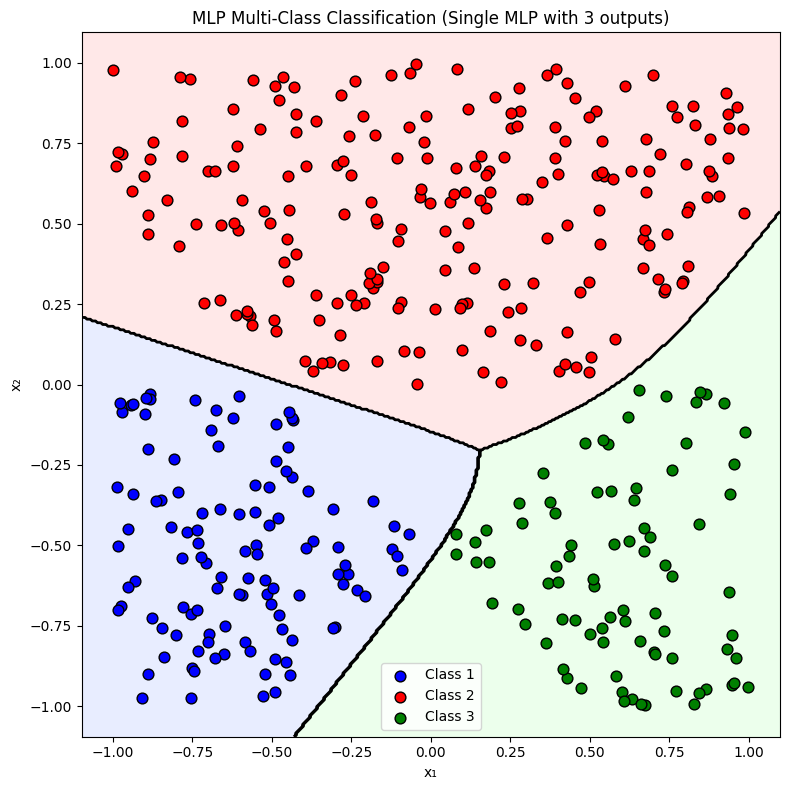


Testing MLP output structure:
Output for [0.5, 0.5]: [7.503034007506861e-06, 0.9946950057681734, 0.000913277490104657]
Output shape: 3 values
Predicted class: 1
Class probabilities: [7.503034007506861e-06, 0.9946950057681734, 0.000913277490104657]


In [209]:
# np.random.seed(0) 



X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([
    [1, 0, 0] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else
    [0, 1, 0] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else
    [0, 0, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else
    [0, 0, 0] for p in X
])
# Remove ambiguous points (all zeros)
# mask = ~np.all(Y == [0, 0, 0], axis=1)
# X = X[mask]
# Y = Y[mask]

print("Multi-class MLP - Training...")
# Create single MLP with 3 outputs (one for each class)
mlp = mk.MLP(
    layers=[2, 2, 3],
    is_classification=True,
    activations=[ 'sigmoid', 'sigmoid'],  # Use softmax for multi-class classification)
)
# Train with one-hot encoded targets
history = mlp.fit(
    x_train=X,
    y_train=Y,  # Use one-hot encoded Y directly
    x_test=X,
    y_test=Y,   # Use one-hot encoded Y directly
    epochs=2000,
    lr=0.01
)



# Create visualization
xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min()-0.1, X[:, 0].max()+0.1, 400),
    np.linspace(X[:, 1].min()-0.1, X[:, 1].max()+0.1, 400)
)
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Get predictions for all grid points
raw_predictions_grid = []
for point in grid_points:
    pred = mlp.predict(point.tolist())
    raw_predictions_grid.append(pred)

raw_predictions_grid = np.array(raw_predictions_grid)

# Convert to class predictions using argmax
Z_pred = np.argmax(raw_predictions_grid, axis=1)
Z_pred = Z_pred.reshape(xx.shape)

# Create custom colormap for the 3 classes
from matplotlib.colors import ListedColormap
zone_cmap = ListedColormap(['#b3c6ff', '#ffb3b3', '#c2ffc2'])

plt.figure(figsize=(8, 8))
plt.contourf(xx, yy, Z_pred, levels=[-0.5,0.5,1.5,2.5], cmap=zone_cmap, alpha=0.3)

# Plot data points
plt.scatter(X[Y[:,0]==1,0], X[Y[:,0]==1,1], color='blue', edgecolor='k', s=60, label='Class 1')
plt.scatter(X[Y[:,1]==1,0], X[Y[:,1]==1,1], color='red', edgecolor='k', s=60, label='Class 2')
plt.scatter(X[Y[:,2]==1,0], X[Y[:,2]==1,1], color='green', edgecolor='k', s=60, label='Class 3')

# Add decision boundaries
plt.contour(xx, yy, Z_pred, levels=[0.5, 1.5], colors='k', linewidths=2)

plt.xlabel('x₁')
plt.ylabel('x₂')
plt.title('MLP Multi-Class Classification (Single MLP with 3 outputs)')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

# Test the MLP output structure
print("\nTesting MLP output structure:")
test_point = [0.5, 0.5]
output = mlp.predict(test_point)
print(f"Output for {test_point}: {output}")
print(f"Output shape: {len(output)} values")
pred_class = np.argmax(output)
print(f"Predicted class: {pred_class}")
print(f"Class probabilities: {output}")

### Multi Cross :
        Linear Model x3 : KO
        MLP (2, ?, ?, 3): OK

In [210]:
X = np.random.random((1000, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else [0, 1, 0] if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else [0, 0, 1] for p in X])

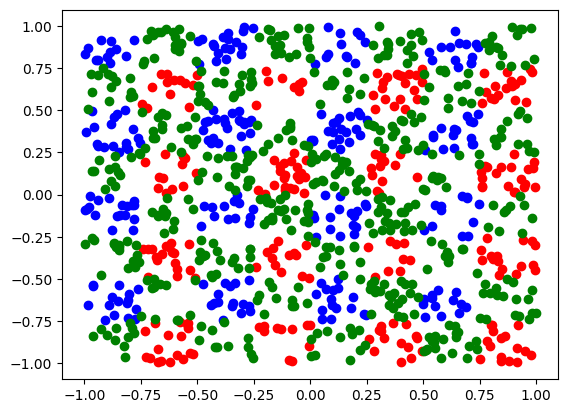

<Figure size 640x480 with 0 Axes>

In [211]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

### MLP Multi Cross

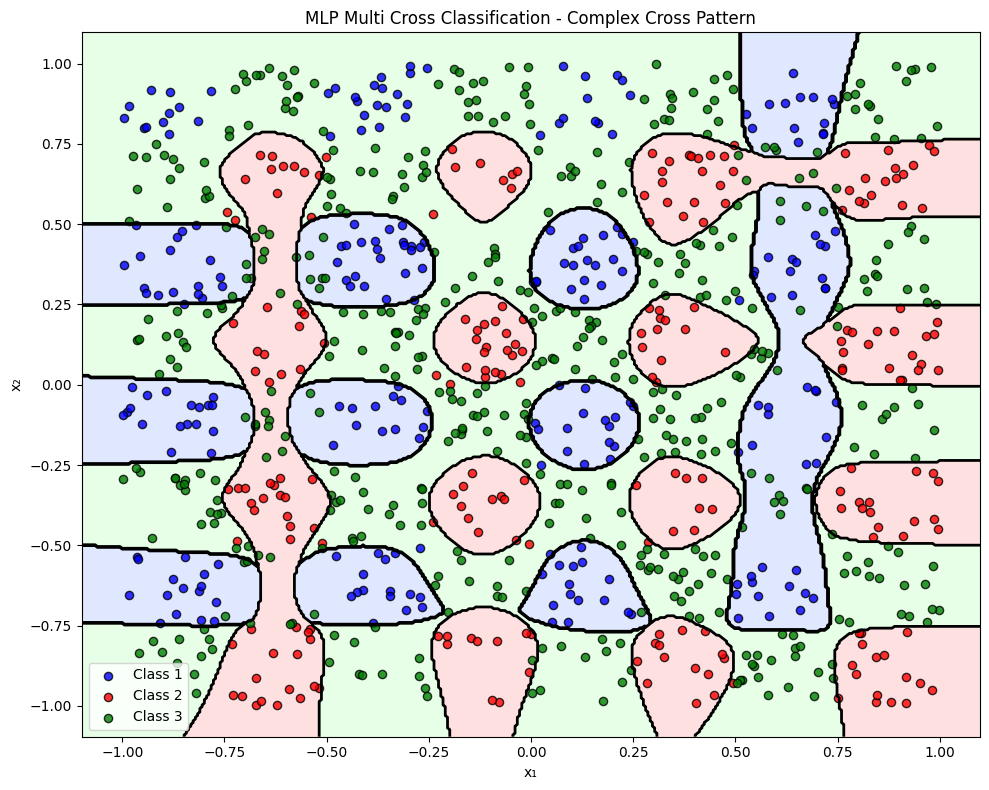


Testing MLP output structure:
Point [0.1, 0.1]: Predicted class 2, Probabilities: [0.004, 0.0, 0.997]
Point [0.8, 0.1]: Predicted class 1, Probabilities: [0.0, 1.0, 0.009]
Point [0.1, 0.8]: Predicted class 2, Probabilities: [0.996, 0.0, 1.0]


In [213]:

mlp = mk.MLP(
    layers=[ 2, 16, 8, 3],  # Deeper network for complex pattern
    is_classification=True,
    activations=['sigmoid', 'sigmoid', 'sigmoid'],  # All sigmoid activations
)

# Train the MLP
history = mlp.fit(
    x_train=X,
    y_train=Y,  # Use one-hot encoded Y directly
    x_test=X,
    y_test=Y,   # Use one-hot encoded Y directly
    epochs=10000,
    lr=0.01
)

# Create visualization
xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min()-0.1, X[:, 0].max()+0.1, 400),
    np.linspace(X[:, 1].min()-0.1, X[:, 1].max()+0.1, 400)
)
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Get predictions for all grid points
raw_predictions_grid = []
for point in grid_points:
    pred = mlp.predict(point.tolist())
    raw_predictions_grid.append(pred)

raw_predictions_grid = np.array(raw_predictions_grid)

# Convert to class predictions using argmax
Z_pred = np.argmax(raw_predictions_grid, axis=1)
Z_pred = Z_pred.reshape(xx.shape)

# Create custom colormap for the 3 classes
from matplotlib.colors import ListedColormap
zone_cmap = ListedColormap(['#b3c6ff', '#ffb3b3', '#c2ffc2'])

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z_pred, levels=[-0.5,0.5,1.5,2.5], cmap=zone_cmap, alpha=0.4)

# Plot data points
plt.scatter(X[Y[:,0]==1,0], X[Y[:,0]==1,1], color='blue', edgecolor='k', s=35, label='Class 1', alpha=0.8)
plt.scatter(X[Y[:,1]==1,0], X[Y[:,1]==1,1], color='red', edgecolor='k', s=35, label='Class 2', alpha=0.8)
plt.scatter(X[Y[:,2]==1,0], X[Y[:,2]==1,1], color='green', edgecolor='k', s=35, label='Class 3', alpha=0.8)

# Add decision boundaries
plt.contour(xx, yy, Z_pred, levels=[0.5, 1.5], colors='k', linewidths=2)

plt.xlabel('x₁')
plt.ylabel('x₂')
plt.title('MLP Multi Cross Classification - Complex Cross Pattern')
plt.legend()
plt.grid(False)
plt.xlim(X[:, 0].min()-0.1, X[:, 0].max()+0.1)
plt.ylim(X[:, 1].min()-0.1, X[:, 1].max()+0.1)
plt.tight_layout()
plt.show()

# Test the MLP output structure
print("\nTesting MLP output structure:")
test_points = [[0.1, 0.1], [0.8, 0.1], [0.1, 0.8]]
for i, test_point in enumerate(test_points):
    output = mlp.predict(test_point)
    pred_class = np.argmax(output)
    print(f"Point {test_point}: Predicted class {pred_class}, Probabilities: {[round(p, 3) for p in output]}")

## Régression

### Linear Simple 2D :
        Linear Model : OK
        MLP (1, 1)   : OK

In [ ]:
X = np.array([
      [1],
      [2]
])
Y = np.array([
      2,
      3
])

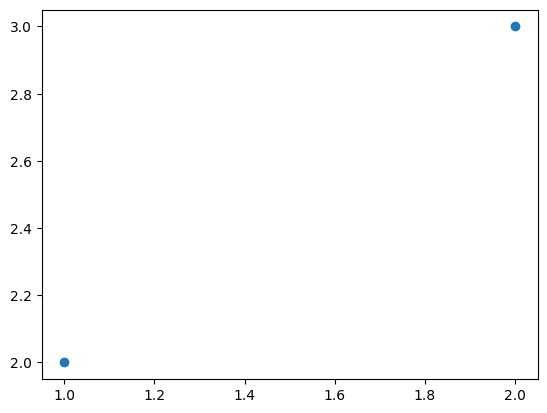

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.scatter(X,Y)
plt.show()
plt.clf()

In [ ]:
# Données simples
X = np.array([
      [1.0],
      [2.0]
])
Y = np.array([
      2.0,
      3.0
])

model = mk.LinearRegression()
model.fit(X, Y)

x_plot = np.linspace(X.min() - 0.5, X.max() + 0.5, 100).reshape(-1, 1)
y_plot = [model.predict(list(x)) for x in x_plot]

plt.figure(figsize=(5, 5))
plt.scatter(X, Y, color='blue', edgecolor='k', s=80, label='Points')
plt.plot(x_plot, y_plot, 'r-', lw=2, label='Droite de régression')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()


### MLP regression Simple

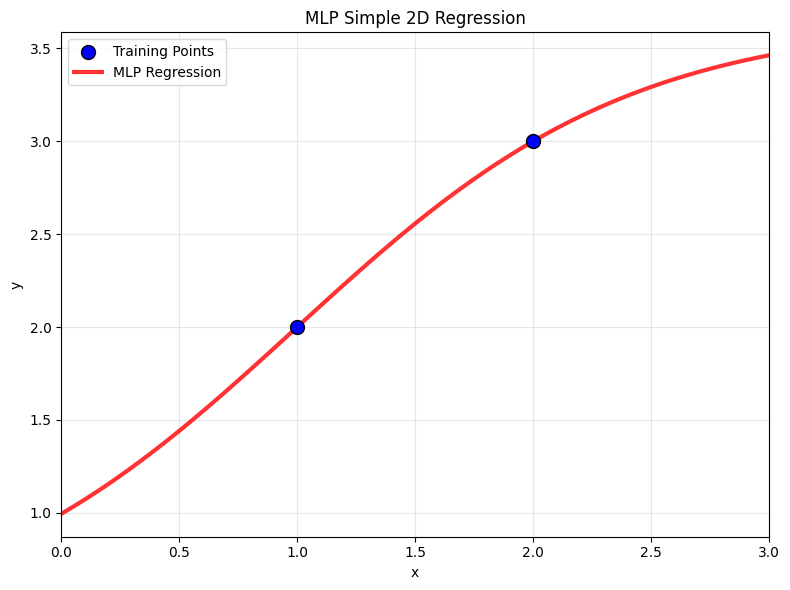


Testing MLP predictions:
Input: 0.5, MLP Prediction: 1.441
Input: 1.5, MLP Prediction: 2.557
Input: 2.5, MLP Prediction: 3.292

Training points:
Input: 1.0, Target: 2.0, MLP Prediction: 2.000
Input: 2.0, Target: 3.0, MLP Prediction: 3.000


In [ ]:


X = np.array([
      [1.0],
      [2.0]
])
Y = np.array([
      2.0,
      3.0
])

# Create MLP model for regression
mlp = mk.MLP(
    layers=[1, 1, 1],  # Simple architecture: 1 input, 4 hidden, 1 output
    is_classification=False,  # Regression task
    activations=['sigmoid', 'linear'],  # Sigmoid hidden, linear output for regression
)

# Train the MLP
history = mlp.fit(
    x_train=X,
    y_train=Y.reshape(-1, 1),  # Reshape Y to be 2D
    x_test=X,
    y_test=Y.reshape(-1, 1),
    epochs=5000,
    lr=0.01,
)

# Create visualization
x_plot = np.linspace(X.min() - 1, X.max() + 1, 100).reshape(-1, 1)
y_plot_mlp = np.array([mlp.predict(x.tolist())[0] for x in x_plot])

plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue', edgecolor='k', s=100, label='Training Points', zorder=5)
plt.plot(x_plot, y_plot_mlp, 'r-', lw=3, label='MLP Regression', alpha=0.8)
plt.xlabel("x")
plt.ylabel("y")
plt.title("MLP Simple 2D Regression")
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(X.min() - 1, X.max() + 1)
plt.tight_layout()
plt.show()



### Non Linear Simple 2D :
        Linear Model    : OK
        MLP (1, ?, 1)   : OK

In [ ]:
X = np.array([
      [1],
      [2],
      [3]
])
Y = np.array([
      2,
      3,
      2.5
])

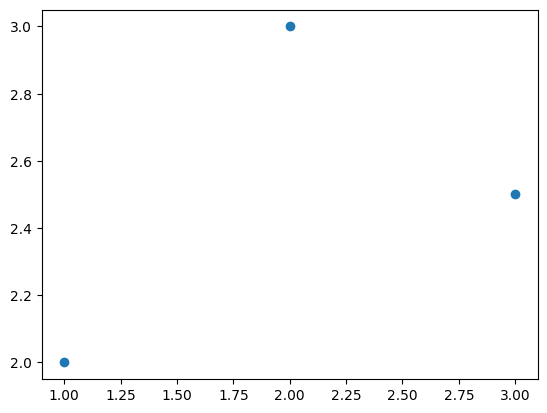

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.scatter(X,Y)
plt.show()
plt.clf()

In [ ]:
X = np.array([
      [1.0],
      [2.0],
      [3.0]
])
Y = np.array([
      2.0,
      3.0,
      2.5
])

model = mk.LinearRegression()
model.fit(X, Y)

x_plot = np.linspace(X.min() - 0.5, X.max() + 0.5, 100).reshape(-1, 1)
y_plot = [model.predict(list(x)) for x in x_plot]

plt.figure(figsize=(5, 5))
plt.scatter(X, Y, color='blue', edgecolor='k', s=80, label='Points')
plt.plot(x_plot, y_plot, 'r-', lw=2, label='Droite de régression')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.tight_layout()
plt.show()


### MLP Non Linear Simple 2D

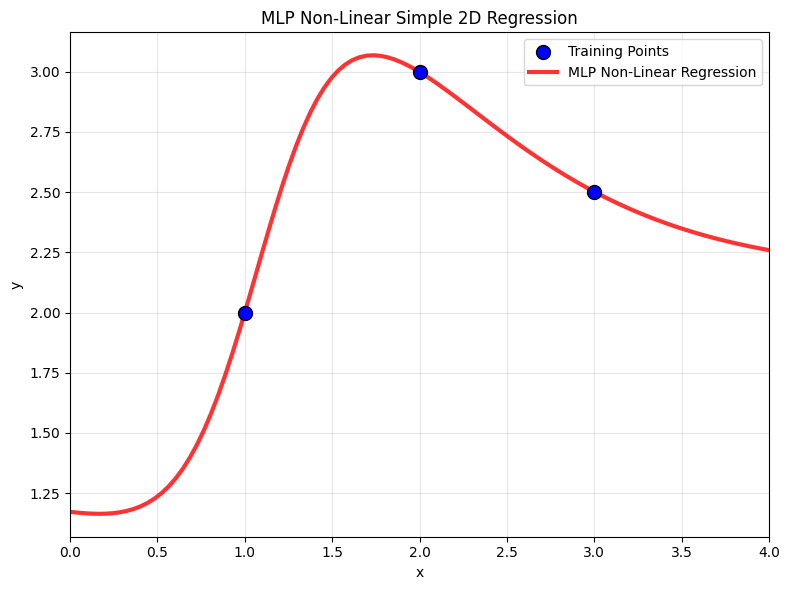

In [ ]:
X = np.array([
      [1.0],
      [2.0],
      [3.0]
])
Y = np.array([
      2.0,
      3.0,
      2.5
])

# Create MLP model for non-linear regression
mlp = mk.MLP(
    layers=[1, 1, 4, 1],  # Deeper network to capture non-linearity
    is_classification=False,  # Regression task
    activations=['linear', 'sigmoid', 'linear'],  # Non-linear hidden layers, linear output
)

# Train the MLP
history = mlp.fit(
    x_train=X,
    y_train=Y.reshape(-1, 1),  # Reshape Y to be 2D
    x_test=X,
    y_test=Y.reshape(-1, 1),
    epochs=8000,
    lr=0.01,
)

# Create visualization
x_plot = np.linspace(X.min() - 1, X.max() + 1, 100).reshape(-1, 1)
y_plot_mlp = np.array([mlp.predict(x.tolist())[0] for x in x_plot])

plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue', edgecolor='k', s=100, label='Training Points', zorder=5)
plt.plot(x_plot, y_plot_mlp, 'r-', lw=3, label='MLP Non-Linear Regression', alpha=0.8)
plt.xlabel("x")
plt.ylabel("y")
plt.title("MLP Non-Linear Simple 2D Regression")
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(X.min() - 1, X.max() + 1)
plt.tight_layout()
plt.show()

### Linear Simple 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

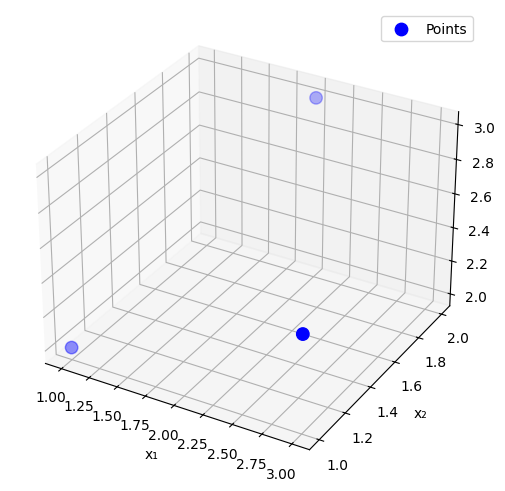

In [ ]:
X = np.array([
    [1, 1],
    [2, 2],
    [3, 1]
])
Y = np.array([
    2,
    3,
    2.5
])

fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y, color='blue', s=80, label='Points')
ax.set_xlabel('x₁')
ax.set_ylabel('x₂')
ax.set_zlabel('y')
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
X = np.array([
    [1.0, 1.0],
    [2.0, 2.0],
    [3.0, 1.0]
])
Y = np.array([
    2.0,
    3.0,
    2.5
])

model = mk.LinearRegression()
model.fit(X.tolist(), Y.tolist())  # Conversion en listes natives Python

fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y, color='blue', s=80, label='Points')

x1_grid = np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 30)
x2_grid = np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 30)
xx1, xx2 = np.meshgrid(x1_grid, x2_grid)
X_surface = np.c_[xx1.ravel(), xx2.ravel()]
y_surface = np.array([model.predict(list(row)) for row in X_surface]).reshape(xx1.shape)

ax.plot_surface(xx1, xx2, y_surface, color='red', alpha=0.5)
ax.set_xlabel('x₁')
ax.set_ylabel('x₂')
ax.set_zlabel('y')
plt.tight_layout()
plt.show()


AttributeError: module 'mini_keras' has no attribute 'LinearRegression'

### MLP Linear Simple 3D

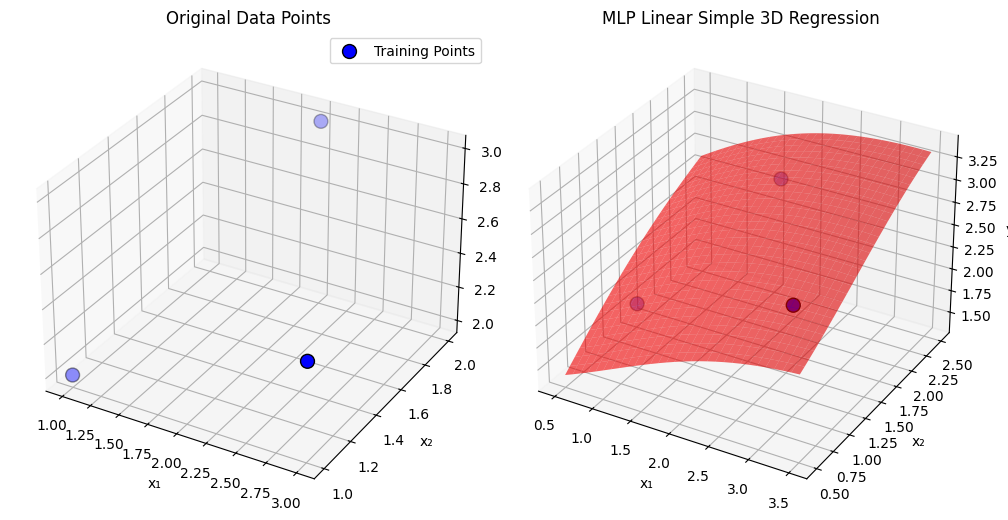

Predictions on original points: [2.000031158542792, 2.9999708090885275, 2.5000035988406637]
Actual values: [2.  3.  2.5]


In [ ]:
X = np.array([
    [1.0, 1.0],
    [2.0, 2.0],
    [3.0, 1.0]
])
Y = np.array([
    2.0,
    3.0,
    2.5
])

# Create MLP model for 3D regression
mlp = mk.MLP(
    layers=[2, 2, 1],  # 2 inputs, hidden layer, 1 output
    is_classification=False,  # Regression task
    activations=['sigmoid', 'linear'],  # Sigmoid hidden, linear output
)

# Train the MLP
history = mlp.fit(
    x_train=X,
    y_train=Y.reshape(-1, 1),  # Reshape Y to be 2D
    x_test=X,
    y_test=Y.reshape(-1, 1),
    epochs=6000,
    lr=0.01,
)

# Create 3D visualization
fig = plt.figure(figsize=(10, 8))

# Original data plot
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X[:,0], X[:,1], Y, color='blue', s=100, label='Training Points', edgecolor='k')
ax1.set_xlabel('x₁')
ax1.set_ylabel('x₂')
ax1.set_zlabel('y')
ax1.set_title('Original Data Points')
ax1.legend()

# MLP surface plot
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X[:,0], X[:,1], Y, color='blue', s=100, label='Training Points', edgecolor='k')

# Create surface
x1_grid = np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 30)
x2_grid = np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 30)
xx1, xx2 = np.meshgrid(x1_grid, x2_grid)
X_surface = np.c_[xx1.ravel(), xx2.ravel()]
y_surface_mlp = np.array([mlp.predict(row.tolist())[0] for row in X_surface]).reshape(xx1.shape)

ax2.plot_surface(xx1, xx2, y_surface_mlp, color='red', alpha=0.6, label='MLP Surface')
ax2.set_xlabel('x₁')
ax2.set_ylabel('x₂')
ax2.set_zlabel('y')
ax2.set_title('MLP Linear Simple 3D Regression')

plt.tight_layout()
plt.show()

# predict on original points
predictions = [mlp.predict(row.tolist())[0] for row in X]
print("Predictions on original points:", predictions)
print("Actual values:", Y)

### Linear Tricky 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

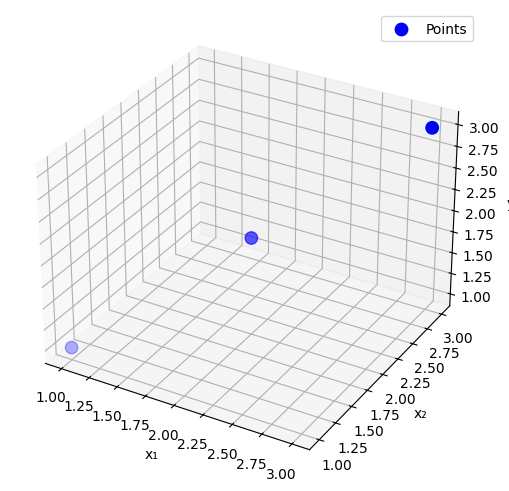

In [ ]:
X = np.array([
      [1.0, 1.0],
      [2.0, 2.0],
      [3.0, 3.0]
])
Y = np.array([
      1.0,
      2.0,
      3.0
])

fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y, color='blue', s=80, label='Points')
ax.set_xlabel('x₁')
ax.set_ylabel('x₂')
ax.set_zlabel('y')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
X = np.array([
      [1.0, 1.0],
      [2.0, 2.0],
      [3.0, 3.0]
])
Y = np.array([
      1.0,
      2.0,
      3.0
])

model = mk.LinearRegression()
model.fit(X, Y)

fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y, color='blue', s=80, label='Points')

x1_grid = np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 30)
x2_grid = np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 30)
xx1, xx2 = np.meshgrid(x1_grid, x2_grid)
X_surface = np.c_[xx1.ravel(), xx2.ravel()]
y_surface = np.array([model.predict(list(row)) for row in X_surface]).reshape(xx1.shape)

ax.plot_surface(xx1, xx2, y_surface, color='red', alpha=0.5)
ax.set_xlabel('x₁')
ax.set_ylabel('x₂')
ax.set_zlabel('y')
plt.tight_layout()
plt.show()



thread '<unnamed>' panicked at src/linear_model.rs:118:33:
XTX not inversible !: Lapack(LapackComputationalFailure { return_code: 3 })
note: run with `RUST_BACKTRACE=1` environment variable to display a backtrace


PanicException: XTX not inversible !: Lapack(LapackComputationalFailure { return_code: 3 })

### MLP Linear Tricky 3D

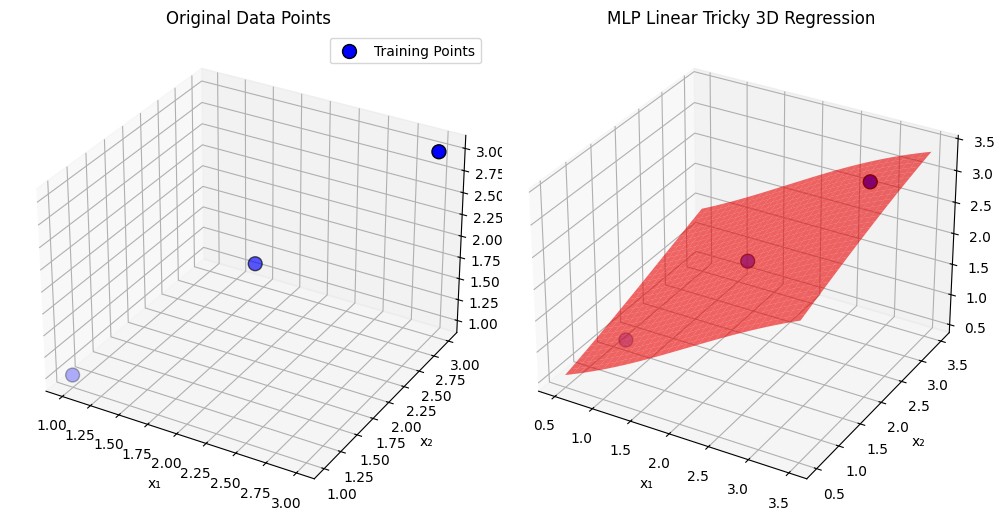

Predictions on original points: [0.9916370319890122, 2.0209708994237405, 2.9871288165936916]
Expected outputs: [1.0, 2.0, 3.0]


In [ ]:
X = np.array([
      [1.0, 1.0],
      [2.0, 2.0],
      [3.0, 3.0]
])
Y = np.array([
      1.0,
      2.0,
      3.0
])

# Create MLP model for tricky 3D regression
mlp = mk.MLP(
    layers=[2, 2, 1],  # 2 inputs, hidden layer, 1 output
    is_classification=False,  # Regression task
    activations=['sigmoid', 'linear'],  # Sigmoid hidden, linear output
)

# Train the MLP
history = mlp.fit(
    x_train=X,
    y_train=Y.reshape(-1, 1),  # Reshape Y to be 2D
    x_test=X,
    y_test=Y.reshape(-1, 1),
    epochs=6000,
    lr=0.01,
)

# Create 3D visualization
fig = plt.figure(figsize=(10, 8))

# Original data plot
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X[:,0], X[:,1], Y, color='blue', s=100, label='Training Points', edgecolor='k')
ax1.set_xlabel('x₁')
ax1.set_ylabel('x₂')
ax1.set_zlabel('y')
ax1.set_title('Original Data Points')
ax1.legend()

# MLP surface plot
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X[:,0], X[:,1], Y, color='blue', s=100, label='Training Points', edgecolor='k')

# Create surface
x1_grid = np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 30)
x2_grid = np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 30)
xx1, xx2 = np.meshgrid(x1_grid, x2_grid)
X_surface = np.c_[xx1.ravel(), xx2.ravel()]
y_surface_mlp = np.array([mlp.predict(row.tolist())[0] for row in X_surface]).reshape(xx1.shape)

ax2.plot_surface(xx1, xx2, y_surface_mlp, color='red', alpha=0.6, label='MLP Surface')
ax2.set_xlabel('x₁')
ax2.set_ylabel('x₂')
ax2.set_zlabel('y')
ax2.set_title('MLP Linear Tricky 3D Regression')

plt.tight_layout()
plt.show()

# predict on original points
predictions = [mlp.predict(row.tolist())[0] for row in X]
print("Predictions on original points:", predictions)
print("Expected outputs:", Y.tolist())

### Non Linear Simple 3D :
        Linear Model       : KO
        MLP (2, 2, 1)      : OK

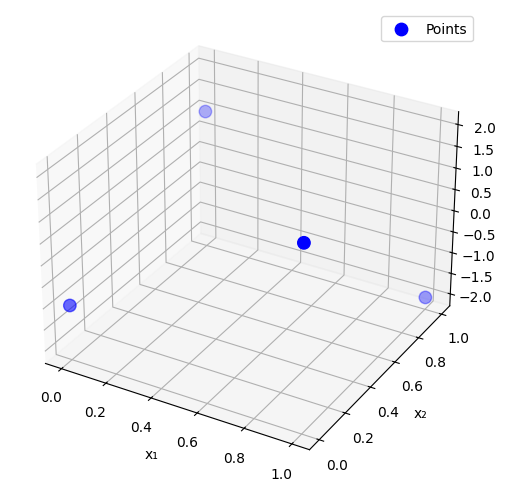

In [ ]:
X = np.array([
      [1.0, 0.0],
      [0.0, 1.0],
      [1.0, 1.0],
      [0.0, 0.0],
])
Y = np.array([
      2.0,
      1.0,
      -2.0,
      -1.0
])

fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y, color='blue', s=80, label='Points')
ax.set_xlabel('x₁')
ax.set_ylabel('x₂')
ax.set_zlabel('y')
plt.legend()
plt.tight_layout()
plt.show()


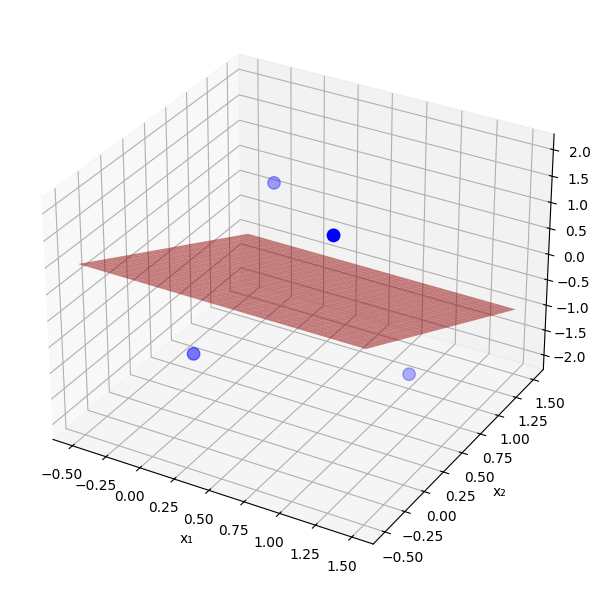

In [ ]:
X = np.array([
      [1.0, 0.0],
      [0.0, 1.0],
      [1.0, 1.0],
      [0.0, 0.0],
])
Y = np.array([
      2.0,
      1.0,
      -2.0,
      -1.0
])

model = mk.LinearRegression()
model.fit(X, Y)
fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y, color='blue', s=80, label='Points')

x1_grid = np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 30)
x2_grid = np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 30)
xx1, xx2 = np.meshgrid(x1_grid, x2_grid)
X_surface = np.c_[xx1.ravel(), xx2.ravel()]
y_surface = np.array([model.predict(list(row)) for row in X_surface]).reshape(xx1.shape)

ax.plot_surface(xx1, xx2, y_surface, color='red', alpha=0.5)
ax.set_xlabel('x₁')
ax.set_ylabel('x₂')
ax.set_zlabel('y')
plt.tight_layout()
plt.show()


### MLP Non Linear Simple 3D

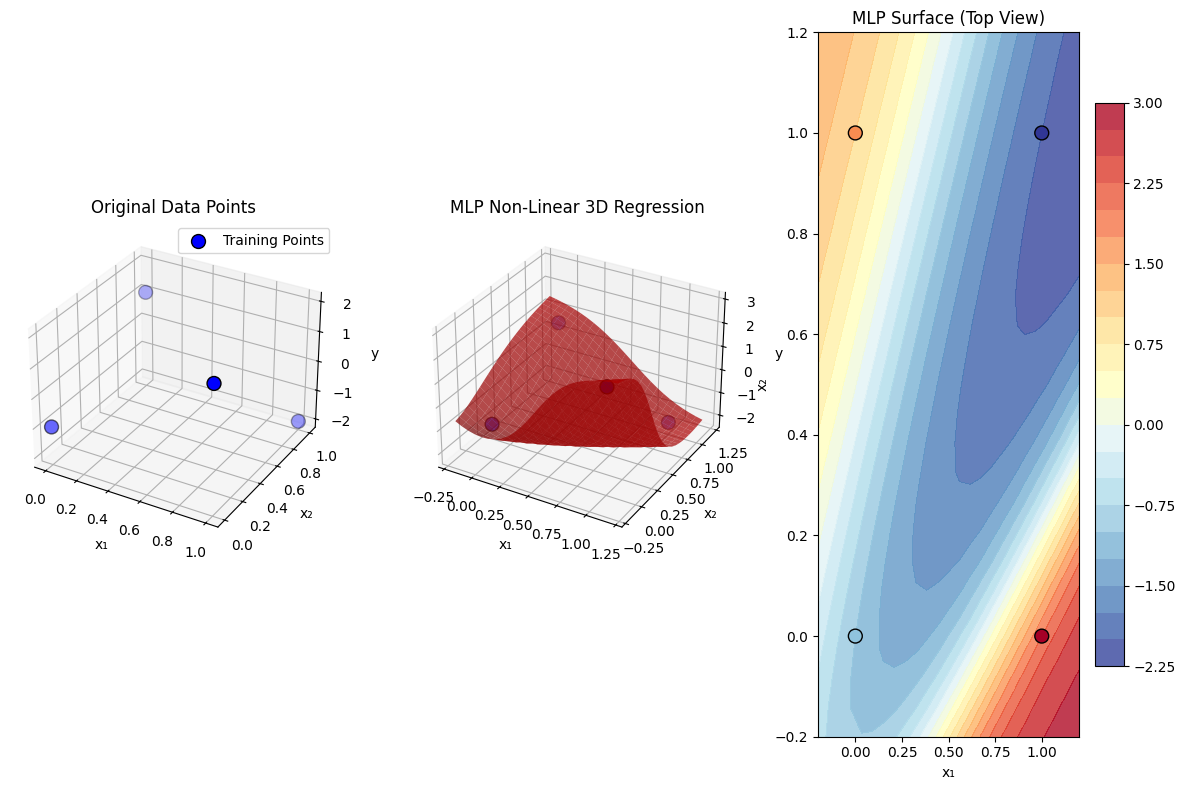

Predictions on original points: [1.9999999999999933, 0.9999999999999996, -1.9999999999999858, -1.0000000000000056]
Expected outputs: [2.0, 1.0, -2.0, -1.0]


In [ ]:
X = np.array([
      [1.0, 0.0],
      [0.0, 1.0],
      [1.0, 1.0],
      [0.0, 0.0],
])
Y = np.array([
      2.0,
      1.0,
      -2.0,
      -1.0
])

# Create MLP model for non-linear 3D regression
mlp = mk.MLP(
    layers=[2, 2, 2, 1],  # Deeper network for non-linear pattern
    is_classification=False,  # Regression task
    activations=['sigmoid', 'sigmoid', 'linear'],  # Non-linear hidden layers, linear output
)

# Train the MLP
history = mlp.fit(
    x_train=X,
    y_train=Y.reshape(-1, 1),  # Reshape Y to be 2D
    x_test=X,
    y_test=Y.reshape(-1, 1),
    epochs=10000,
    lr=0.01,
)

# Create 3D visualization
fig = plt.figure(figsize=(12, 8))

# Original data plot
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(X[:,0], X[:,1], Y, color='blue', s=100, label='Training Points', edgecolor='k')
ax1.set_xlabel('x₁')
ax1.set_ylabel('x₂')
ax1.set_zlabel('y')
ax1.set_title('Original Data Points')
ax1.legend()

# MLP surface plot
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(X[:,0], X[:,1], Y, color='blue', s=100, label='Training Points', edgecolor='k')

# Create surface
x1_grid = np.linspace(X[:,0].min()-0.2, X[:,0].max()+0.2, 25)
x2_grid = np.linspace(X[:,1].min()-0.2, X[:,1].max()+0.2, 25)
xx1, xx2 = np.meshgrid(x1_grid, x2_grid)
X_surface = np.c_[xx1.ravel(), xx2.ravel()]
y_surface_mlp = np.array([mlp.predict(row.tolist())[0] for row in X_surface]).reshape(xx1.shape)

ax2.plot_surface(xx1, xx2, y_surface_mlp, color='red', alpha=0.7, label='MLP Surface')
ax2.set_xlabel('x₁')
ax2.set_ylabel('x₂')
ax2.set_zlabel('y')
ax2.set_title('MLP Non-Linear 3D Regression')

# Contour plot view
ax3 = fig.add_subplot(133)
contour = ax3.contourf(xx1, xx2, y_surface_mlp, levels=20, cmap='RdYlBu_r', alpha=0.8)
ax3.scatter(X[:,0], X[:,1], c=Y, s=100, edgecolor='k', cmap='RdYlBu_r', zorder=5)
ax3.set_xlabel('x₁')
ax3.set_ylabel('x₂')
ax3.set_title('MLP Surface (Top View)')
plt.colorbar(contour, ax=ax3, shrink=0.8)

plt.tight_layout()
plt.show()

# predict on original points
predictions = [mlp.predict(row.tolist())[0] for row in X]
print("Predictions on original points:", predictions)
print("Expected outputs:", Y.tolist())

### SVM

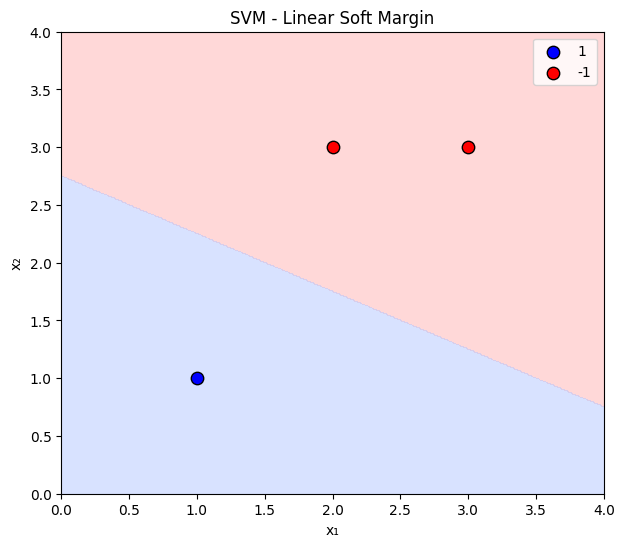

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import mini_keras as mk

X = np.array([
    [1, 1],
    [2, 3],
    [3, 3]
])
Y = np.array([1, -1, -1])

model = mk.SVM(c=1, kernel="linear") 
model.fit(X.tolist(), Y.tolist())

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
grid = np.c_[xx.ravel(), yy.ravel()]

Z = np.array([model.predict([pt.tolist()])[0] for pt in grid])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(7, 6))
plt.contourf(xx, yy, Z, levels=[-2, 0, 2], colors=['#ffb3b3', '#b3c6ff'], alpha=0.5)
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], color='blue', label='1', edgecolor='k', s=80)
plt.scatter(X[Y == -1, 0], X[Y == -1, 1], color='red', label='-1', edgecolor='k', s=80)

if model.weights is not None:
    w1, w2 = model.weights
    b = model.b

plt.xlabel("x₁")
plt.ylabel("x₂")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend()
plt.title("SVM - Linear Soft Margin")
plt.show()


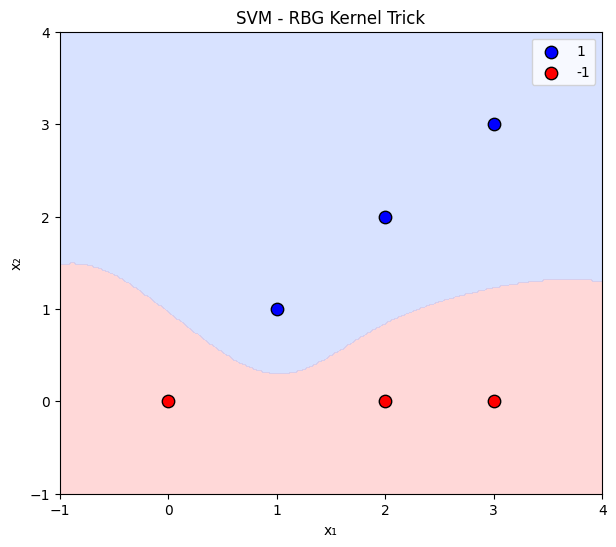

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import mini_keras as mk

X = np.array([
    [1, 1],
    [2, 2],
    [2, 0],
    [0, 0],
    [3, 3],
    [3, 0]
])
Y = np.array([1, 1, -1, -1, 1, -1])

model = mk.SVM(c=1.0, kernel="rbf", gamma=1.0)
model.fit(X.tolist(), Y.tolist())

xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 300),
    np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 300)
)
grid = np.c_[xx.ravel(), yy.ravel()]
Z = np.array([model.predict([pt.tolist()])[0] for pt in grid])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(7, 6))
plt.contourf(xx, yy, Z, levels=[-2, 0, 2], colors=["#ffb3b3", "#b3c6ff"], alpha=0.5)
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], color="blue", label="1", edgecolor='k', s=80)
plt.scatter(X[Y == -1, 0], X[Y == -1, 1], color="red", label="-1", edgecolor='k', s=80)

plt.legend()
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.title("SVM - RBG Kernel Trick")
plt.xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
plt.show()


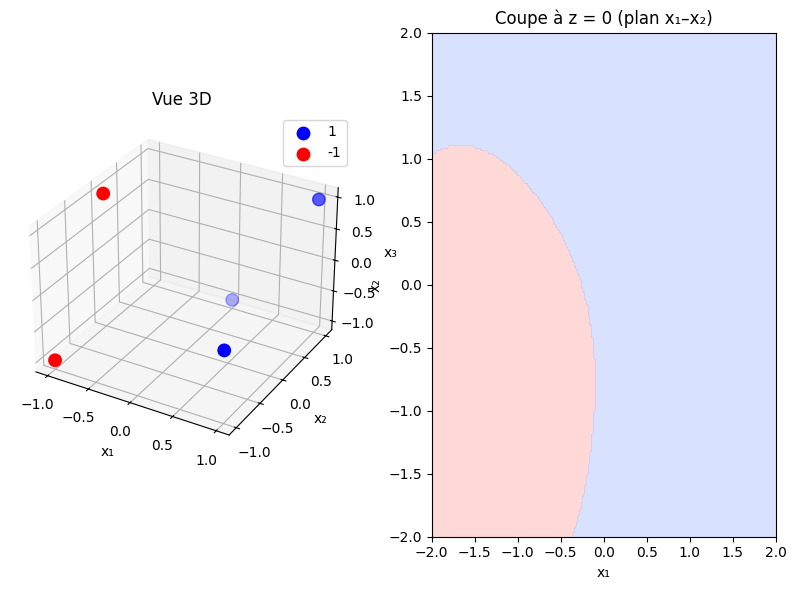

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import mini_keras as mk

X = np.array([
    [-1, -1, -1],
    [1, 1, 1],
    [0, 1, -1],
    [-1, 0, 1],
    [1, -1, 0]
])
Y = np.array([-1, 1, 1, -1, 1])

model = mk.SVM(c=1.0, kernel="rbf", gamma=0.5)
model.fit(X.tolist(), Y.tolist())

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X[Y == 1, 0], X[Y == 1, 1], X[Y == 1, 2], c='blue', label='1', s=80)
ax.scatter(X[Y == -1, 0], X[Y == -1, 1], X[Y == -1, 2], c='red', label='-1', s=80)

ax.set_title("Vue 3D")
ax.set_xlabel("x₁")
ax.set_ylabel("x₂")
ax.set_zlabel("x₃")
ax.legend()

# === 
ax2 = fig.add_subplot(122)

xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 200),
    np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 200)
)
zz = np.zeros_like(xx)
grid = np.c_[xx.ravel(), yy.ravel(), zz.ravel()] 

Z = np.array([model.predict([pt.tolist()])[0] for pt in grid])
Z = Z.reshape(xx.shape)

ax2.contourf(xx, yy, Z, levels=[-2, 0, 2], colors=['#ffb3b3', '#b3c6ff'], alpha=0.5)
ax2.set_title("Coupe à z = 0 (plan x₁–x₂)")
ax2.set_xlabel("x₁")
ax2.set_ylabel("x₂")

plt.tight_layout()
plt.show()


# RBF Classification

### RBF Naive Linear Multiple

In [ ]:
X = np.concatenate([np.random.random((50,2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])])
Y = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * -1.0])

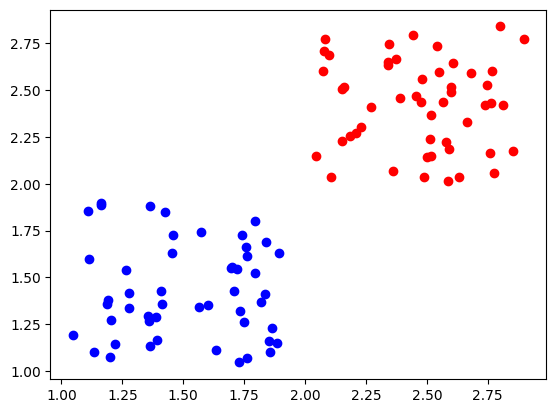

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.scatter(X[0:50, 0], X[0:50, 1], color='blue')
plt.scatter(X[50:100,0], X[50:100,1], color='red')
plt.show()
plt.clf()

C:\Users\chara\AppData\Local\Temp\ipykernel_9124\3549014359.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rbfnaive = mk.RBFNaive(


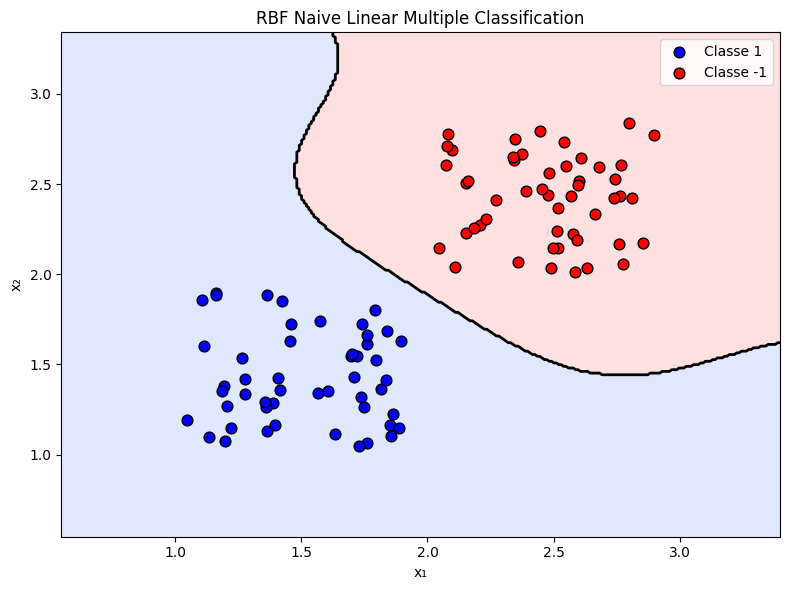

In [ ]:

rbfnaive = mk.RBFNaive(
    x=X,
    y=Y,
    gamma=0.01,
    is_class=True,
)

# Create decision boundary visualization for RBF
xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 300),
    np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 300)
)
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Get predictions from the RBF model
Z = np.array([rbfnaive.predict(point.tolist()) for point in grid_points])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, levels=[-2, 0, 2], colors=['#ffb3b3', '#b3c6ff'], alpha=0.4)

plt.scatter(X[0:50, 0], X[0:50, 1], color='blue', edgecolor='k', s=60, label='Classe 1')
plt.scatter(X[50:100, 0], X[50:100, 1], color='red', edgecolor='k', s=60, label='Classe -1')

# Add decision boundary contour
plt.contour(xx, yy, Z, levels=[0], colors='black', linewidths=2, linestyles='-')

plt.legend()
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.title("RBF Naive Linear Multiple Classification")
plt.xlim(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5)
plt.ylim(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5)
plt.tight_layout()
plt.show()


### RBF Naive Ellipse Dataset

Inner ellipse points: 200
Outer ellipse points: 200
Total points: 400


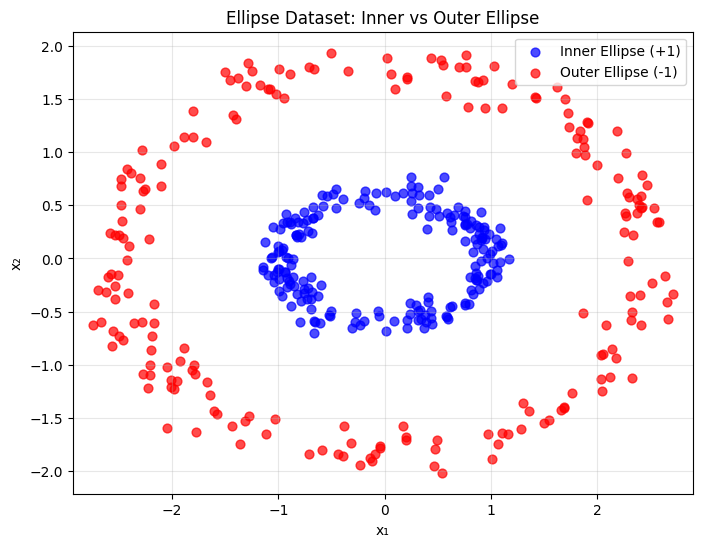

In [232]:
# Generate ellipse dataset with inner and outer ellipse classes

# Parameters for ellipses
center = [0, 0]
n_points_per_class = 200

# Inner ellipse (Class 1) - smaller ellipse
inner_a, inner_b = 1.0, 0.6  # semi-major and semi-minor axes
theta_inner = np.random.uniform(0, 2*np.pi, n_points_per_class)
# Add some noise to make it more realistic
noise_inner = np.random.normal(0, 0.1, (n_points_per_class, 2))
X_inner = np.column_stack([
    inner_a * np.cos(theta_inner) + center[0] + noise_inner[:, 0],
    inner_b * np.sin(theta_inner) + center[1] + noise_inner[:, 1]
])

# Outer ellipse (Class -1) - larger ellipse ring
outer_a, outer_b = 2.5, 1.8  # semi-major and semi-minor axes
theta_outer = np.random.uniform(0, 2*np.pi, n_points_per_class)
# Add some noise
noise_outer = np.random.normal(0, 0.15, (n_points_per_class, 2))
X_outer_temp = np.column_stack([
    outer_a * np.cos(theta_outer) + center[0] + noise_outer[:, 0],
    outer_b * np.sin(theta_outer) + center[1] + noise_outer[:, 1]
])

# Filter outer points to create a ring (remove points too close to center)
distances = np.sqrt(X_outer_temp[:, 0]**2 + (X_outer_temp[:, 1]/0.7)**2)  # elliptical distance
X_outer = X_outer_temp[distances > 1.5]  # Keep only points outside inner region

# If we don't have enough outer points, generate more
while len(X_outer) < n_points_per_class:
    theta_extra = np.random.uniform(0, 2*np.pi, 50)
    noise_extra = np.random.normal(0, 0.15, (50, 2))
    X_extra = np.column_stack([
        outer_a * np.cos(theta_extra) + center[0] + noise_extra[:, 0],
        outer_b * np.sin(theta_extra) + center[1] + noise_extra[:, 1]
    ])
    distances_extra = np.sqrt(X_extra[:, 0]**2 + (X_extra[:, 1]/0.7)**2)
    X_extra_filtered = X_extra[distances_extra > 1.5]
    X_outer = np.vstack([X_outer, X_extra_filtered])

# Take exactly n_points_per_class for outer ellipse
X_outer = X_outer[:n_points_per_class]

# Combine datasets
X_ellipse = np.vstack([X_inner, X_outer])
Y_ellipse = np.concatenate([
    np.ones((len(X_inner), 1)),      # Inner ellipse: class +1
    -np.ones((len(X_outer), 1))      # Outer ellipse: class -1
])

print(f"Inner ellipse points: {len(X_inner)}")
print(f"Outer ellipse points: {len(X_outer)}")
print(f"Total points: {len(X_ellipse)}")

# Visualize the ellipse dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_inner[:, 0], X_inner[:, 1], color='blue', label='Inner Ellipse (+1)', alpha=0.7, s=40)
plt.scatter(X_outer[:, 0], X_outer[:, 1], color='red', label='Outer Ellipse (-1)', alpha=0.7, s=40)
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.title("Ellipse Dataset: Inner vs Outer Ellipse")
plt.legend()
plt.axis('equal')
plt.grid(True, alpha=0.3)
plt.show()

C:\Users\chara\AppData\Local\Temp\ipykernel_9124\3642768626.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rbf_ellipse = mk.RBFNaive(


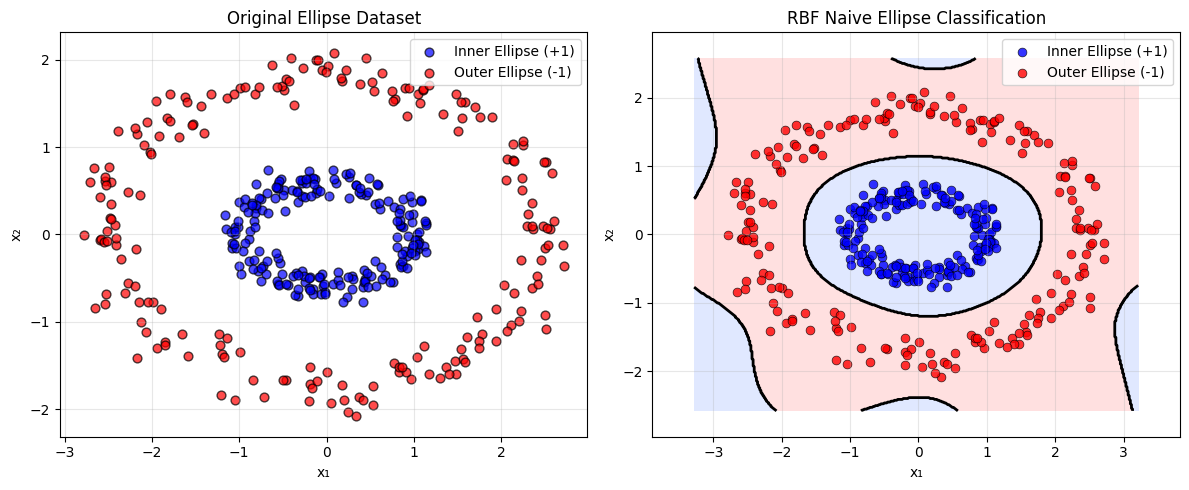

In [ ]:





# Train RBF model on ellipse dataset
rbf_ellipse = mk.RBFNaive(
    x=X_ellipse,
    y=Y_ellipse,
    gamma=0.1,
    is_class=True,
)

# Create decision boundary visualization for RBF Ellipse
xx, yy = np.meshgrid(
    np.linspace(X_ellipse[:, 0].min() - 0.5, X_ellipse[:, 0].max() + 0.5, 400),
    np.linspace(X_ellipse[:, 1].min() - 0.5, X_ellipse[:, 1].max() + 0.5, 400)
)
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Get predictions from the RBF model
Z = np.array([rbf_ellipse.predict(point.tolist()) for point in grid_points])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(12, 5))

# Left plot: Original dataset
plt.subplot(1, 2, 1)
plt.scatter(X_inner[:, 0], X_inner[:, 1], color='blue', label='Inner Ellipse (+1)', alpha=0.7, s=40, edgecolor='k')
plt.scatter(X_outer[:, 0], X_outer[:, 1], color='red', label='Outer Ellipse (-1)', alpha=0.7, s=40, edgecolor='k')
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.title("Original Ellipse Dataset")
plt.legend()
plt.axis('equal')
plt.grid(True, alpha=0.3)

# Right plot: RBF classification with decision boundary
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z, levels=[-2, 0, 2], colors=['#ffb3b3', '#b3c6ff'], alpha=0.4)

plt.scatter(X_inner[:, 0], X_inner[:, 1], color='blue', label='Inner Ellipse (+1)', 
           alpha=0.8, s=40, edgecolor='k', linewidth=0.5)
plt.scatter(X_outer[:, 0], X_outer[:, 1], color='red', label='Outer Ellipse (-1)', 
           alpha=0.8, s=40, edgecolor='k', linewidth=0.5)

# Add decision boundary contour
plt.contour(xx, yy, Z, levels=[0], colors='black', linewidths=2, linestyles='-')

plt.xlabel("x₁")
plt.ylabel("x₂")
plt.title("RBF Naive Ellipse Classification")
plt.legend()
plt.axis('equal')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()






# RBF w/ K-means

### RBF-KMEANS Ellipse Dataset

C:\Users\chara\AppData\Local\Temp\ipykernel_9124\716641710.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rbf_kmeans_ellipse = mk.RBFKMeans(


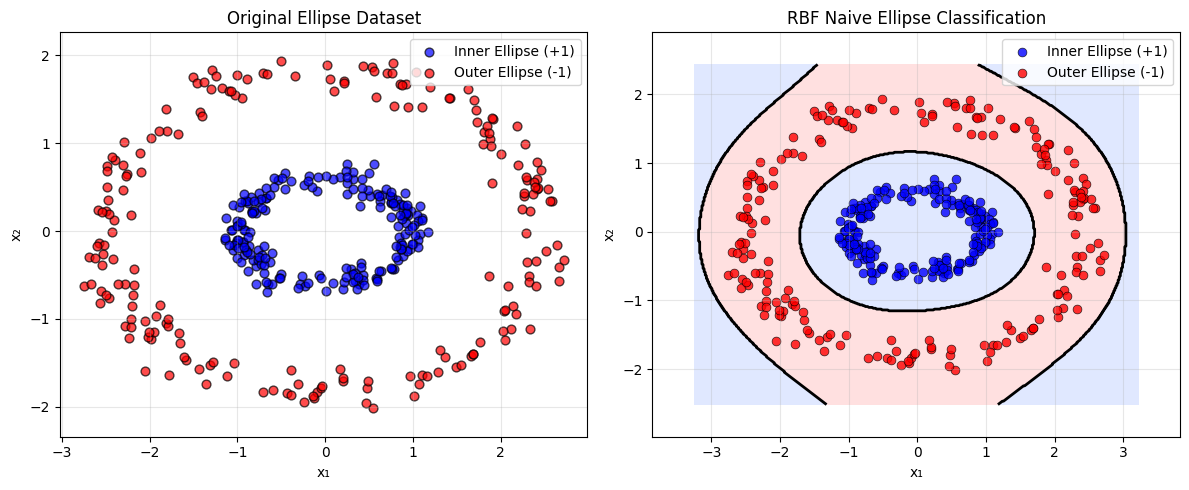

In [239]:
rbf_kmeans_ellipse = mk.RBFKMeans(
    x=X_ellipse,
    y=Y_ellipse,
    gamma=0.1,
    is_class=True,
    k=int(0.1 * X_ellipse.shape[0]), 
    max_iters=1000,
)



# Create decision boundary visualization for RBF Ellipse
xx, yy = np.meshgrid(
    np.linspace(X_ellipse[:, 0].min() - 0.5, X_ellipse[:, 0].max() + 0.5, 400),
    np.linspace(X_ellipse[:, 1].min() - 0.5, X_ellipse[:, 1].max() + 0.5, 400)
)
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Get predictions from the RBF model
Z = np.array([rbf_kmeans_ellipse.predict(point.tolist()) for point in grid_points])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(12, 5))

# Left plot: Original dataset
plt.subplot(1, 2, 1)
plt.scatter(X_inner[:, 0], X_inner[:, 1], color='blue', label='Inner Ellipse (+1)', alpha=0.7, s=40, edgecolor='k')
plt.scatter(X_outer[:, 0], X_outer[:, 1], color='red', label='Outer Ellipse (-1)', alpha=0.7, s=40, edgecolor='k')
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.title("Original Ellipse Dataset")
plt.legend()
plt.axis('equal')
plt.grid(True, alpha=0.3)

# Right plot: RBF classification with decision boundary
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z, levels=[-2, 0, 2], colors=['#ffb3b3', '#b3c6ff'], alpha=0.4)

plt.scatter(X_inner[:, 0], X_inner[:, 1], color='blue', label='Inner Ellipse (+1)', 
           alpha=0.8, s=40, edgecolor='k', linewidth=0.5)
plt.scatter(X_outer[:, 0], X_outer[:, 1], color='red', label='Outer Ellipse (-1)', 
           alpha=0.8, s=40, edgecolor='k', linewidth=0.5)

# Add decision boundary contour
plt.contour(xx, yy, Z, levels=[0], colors='black', linewidths=2, linestyles='-')

plt.xlabel("x₁")
plt.ylabel("x₂")
plt.title("RBF Naive Ellipse Classification")
plt.legend()
plt.axis('equal')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### RBF Naive Spiral Dataset

Spiral 1 points: 200
Spiral 2 points: 200
Total points: 400


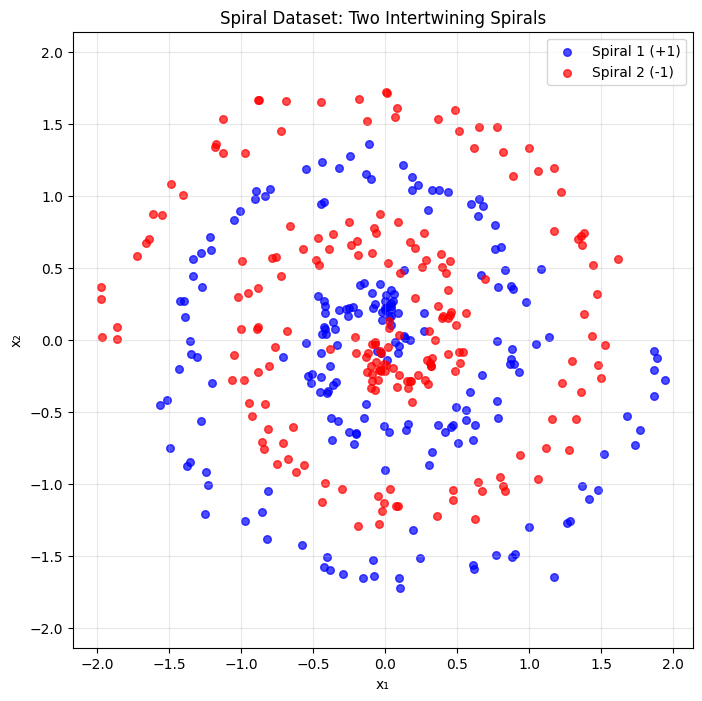

In [255]:


def generate_spiral_dataset():
    n_points = 200
    t = np.linspace(0, 4*np.pi, n_points)
    
    # Spiral 1 (class +1) - clockwise
    noise1 = np.random.normal(0, 0.1, (n_points, 2))
    X_spiral1 = np.column_stack([
        t * np.cos(t) * 0.15 + noise1[:, 0],
        t * np.sin(t) * 0.15 + noise1[:, 1]
    ])
    
    # Spiral 2 (class -1) - counter-clockwise, offset by π
    noise2 = np.random.normal(0, 0.1, (n_points, 2))
    X_spiral2 = np.column_stack([
        t * np.cos(t + np.pi) * 0.15 + noise2[:, 0],
        t * np.sin(t + np.pi) * 0.15 + noise2[:, 1]
    ])
    
    return X_spiral1, X_spiral2

# Generate the spiral data
X_spiral1, X_spiral2 = generate_spiral_dataset()

# Combine the datasets
X_spiral = np.vstack([X_spiral1, X_spiral2])
Y_spiral = np.concatenate([
    np.ones((len(X_spiral1), 1)),      # Spiral 1: class +1
    -np.ones((len(X_spiral2), 1))      # Spiral 2: class -1
])

print(f"Spiral 1 points: {len(X_spiral1)}")
print(f"Spiral 2 points: {len(X_spiral2)}")
print(f"Total points: {len(X_spiral)}")

# Visualize the spiral dataset
plt.figure(figsize=(8, 8))
plt.scatter(X_spiral1[:, 0], X_spiral1[:, 1], color='blue', label='Spiral 1 (+1)', alpha=0.7, s=30)
plt.scatter(X_spiral2[:, 0], X_spiral2[:, 1], color='red', label='Spiral 2 (-1)', alpha=0.7, s=30)
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.title("Spiral Dataset: Two Intertwining Spirals")
plt.legend()
plt.axis('equal')
plt.grid(True, alpha=0.3)
plt.show()

C:\Users\chara\AppData\Local\Temp\ipykernel_9124\47399046.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rbf_spiral = mk.RBFKMeans(


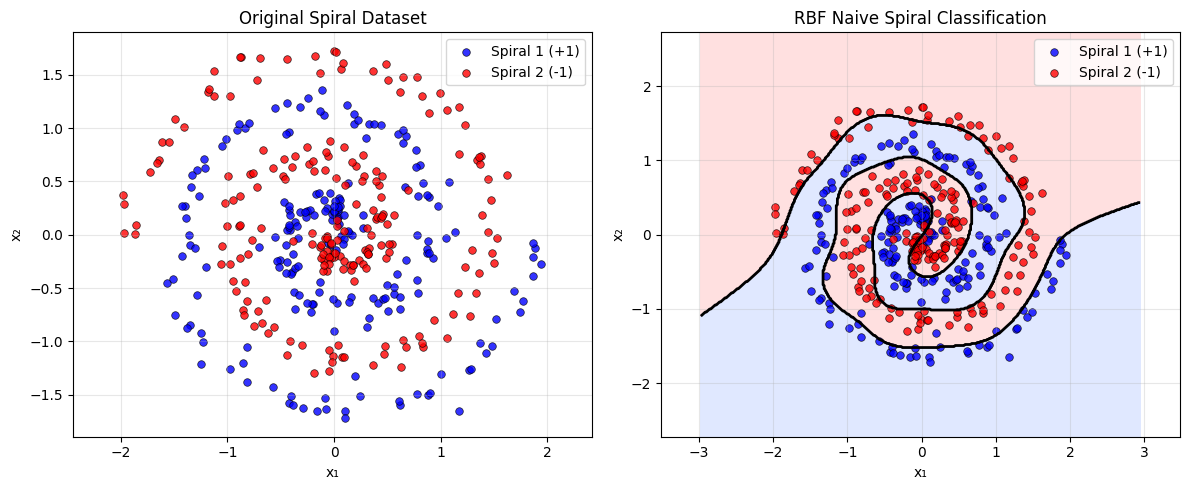

In [257]:
# Train RBF model on spiral dataset
rbf_spiral = mk.RBFKMeans(
    x=X_spiral,
    y=Y_spiral,
    gamma=1,  # Higher gamma for more complex patterns
    is_class=True,
    k=int(0.1 * X_spiral.shape[0]),  # Use 10% of points as centers
    max_iters=1000,
)

# Create decision boundary visualization for RBF Spiral
xx, yy = np.meshgrid(
    np.linspace(X_spiral[:, 0].min() - 1, X_spiral[:, 0].max() + 1, 400),
    np.linspace(X_spiral[:, 1].min() - 1, X_spiral[:, 1].max() + 1, 400)
)
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Get predictions from the RBF model
Z = np.array([rbf_spiral.predict(point.tolist()) for point in grid_points])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(12, 5))

# Left plot: Original spiral dataset
plt.subplot(1, 2, 1)
plt.scatter(X_spiral1[:, 0], X_spiral1[:, 1], color='blue', label='Spiral 1 (+1)', 
           alpha=0.8, s=30, edgecolor='k', linewidth=0.5)
plt.scatter(X_spiral2[:, 0], X_spiral2[:, 1], color='red', label='Spiral 2 (-1)', 
           alpha=0.8, s=30, edgecolor='k', linewidth=0.5)
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.title("Original Spiral Dataset")
plt.legend()
plt.axis('equal')
plt.grid(True, alpha=0.3)

# Right plot: RBF classification with decision boundary
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z, levels=[-2, 0, 2], colors=['#ffb3b3', '#b3c6ff'], alpha=0.4)

plt.scatter(X_spiral1[:, 0], X_spiral1[:, 1], color='blue', label='Spiral 1 (+1)', 
           alpha=0.8, s=30, edgecolor='k', linewidth=0.5)
plt.scatter(X_spiral2[:, 0], X_spiral2[:, 1], color='red', label='Spiral 2 (-1)', 
           alpha=0.8, s=30, edgecolor='k', linewidth=0.5)

# Add decision boundary contour
plt.contour(xx, yy, Z, levels=[0], colors='black', linewidths=2, linestyles='-')

plt.xlabel("x₁")
plt.ylabel("x₂")
plt.title("RBF Naive Spiral Classification")
plt.legend()
plt.axis('equal')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



### RBF KMeans Checkerboard Dataset


Checkerboard dataset shape: (800, 2)
Class distribution: (array([0, 1]), array([400, 400]))


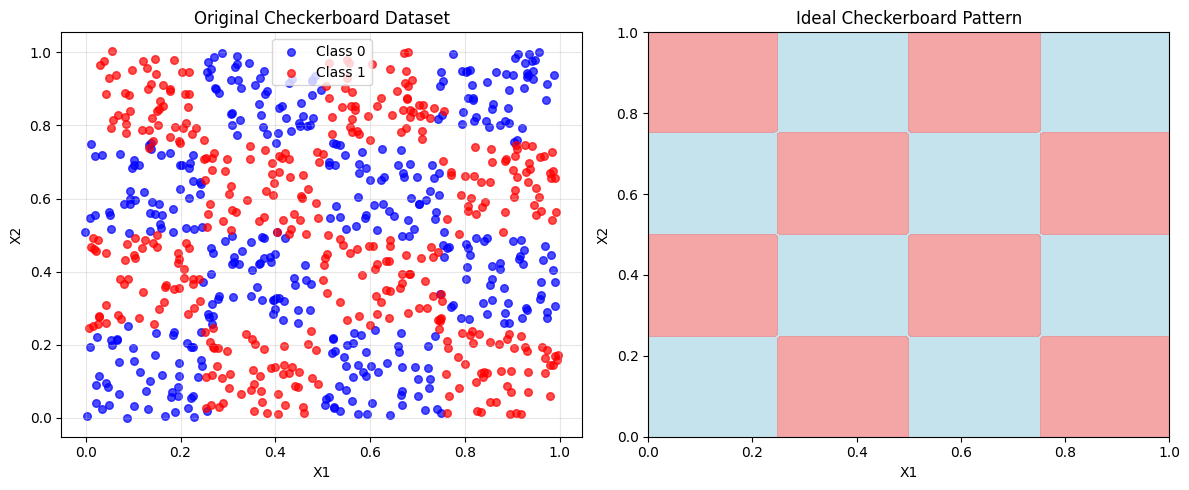

In [282]:
# Generate Checkerboard Dataset
def generate_checkerboard_dataset(n_squares=4, points_per_square=50, noise=0.1):
    """
    Generate a checkerboard pattern dataset with alternating classes
    
    Parameters:
    - n_squares: number of squares per side (total squares = n_squares^2)
    - points_per_square: number of points to generate per square
    - noise: amount of noise to add to the data
    """
    X_checkerboard = []
    Y_checkerboard = []
    
    # Generate points for each square in the checkerboard
    for i in range(n_squares):
        for j in range(n_squares):
            # Determine class based on checkerboard pattern
            class_label = (i + j) % 2
            
            # Define square boundaries
            x_min, x_max = i / n_squares, (i + 1) / n_squares
            y_min, y_max = j / n_squares, (j + 1) / n_squares
            
            # Generate random points within the square
            x_points = np.random.uniform(x_min, x_max, points_per_square)
            y_points = np.random.uniform(y_min, y_max, points_per_square)
            
            # Add noise
            x_points += np.random.normal(0, noise * (x_max - x_min), points_per_square)
            y_points += np.random.normal(0, noise * (y_max - y_min), points_per_square)
            
            # Collect points and labels (use 0 and 1 for RBFKMeans)
            for x, y in zip(x_points, y_points):
                X_checkerboard.append([x, y])
                Y_checkerboard.append(class_label)  # 0 or 1
    
    return np.array(X_checkerboard), np.array(Y_checkerboard)

# Generate the checkerboard dataset
X_checkerboard, Y_checkerboard = generate_checkerboard_dataset(n_squares=4, points_per_square=50, noise=0.02)

print(f"Checkerboard dataset shape: {X_checkerboard.shape}")
print(f"Class distribution: {np.unique(Y_checkerboard, return_counts=True)}")

# Visualize the original checkerboard dataset
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
class_0_mask = Y_checkerboard == 0
class_1_mask = Y_checkerboard == 1

plt.scatter(X_checkerboard[class_0_mask, 0], X_checkerboard[class_0_mask, 1], 
           c='blue', alpha=0.7, s=30, label='Class 0')
plt.scatter(X_checkerboard[class_1_mask, 0], X_checkerboard[class_1_mask, 1], 
           c='red', alpha=0.7, s=30, label='Class 1')
plt.title('Original Checkerboard Dataset')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True, alpha=0.3)

# Show the ideal checkerboard pattern
plt.subplot(1, 2, 2)
# Create a grid to show the ideal pattern
x_grid = np.linspace(0, 1, 100)
y_grid = np.linspace(0, 1, 100)
X_grid, Y_grid = np.meshgrid(x_grid, y_grid)

# Calculate ideal checkerboard pattern
n_squares = 4
ideal_pattern = np.zeros_like(X_grid)
for i in range(len(x_grid)):
    for j in range(len(y_grid)):
        square_i = int(X_grid[i, j] * n_squares)
        square_j = int(Y_grid[i, j] * n_squares)
        if square_i >= n_squares:
            square_i = n_squares - 1
        if square_j >= n_squares:
            square_j = n_squares - 1
        ideal_pattern[i, j] = (square_i + square_j) % 2

plt.contourf(X_grid, Y_grid, ideal_pattern, levels=1, colors=['lightblue', 'lightcoral'], alpha=0.7)
plt.title('Ideal Checkerboard Pattern')
plt.xlabel('X1')
plt.ylabel('X2')

plt.tight_layout()
plt.show()

Total accuracy: 0.765


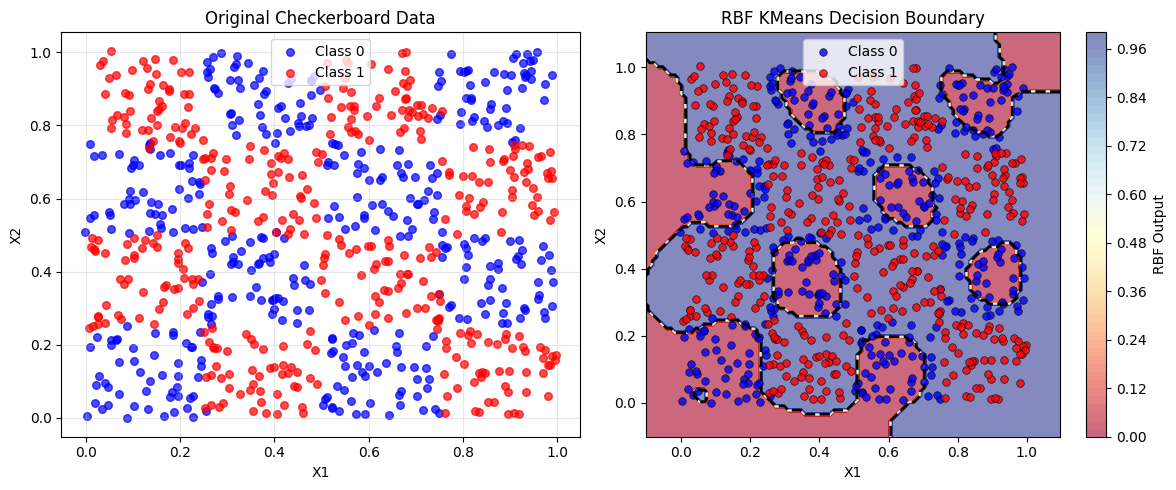

In [298]:

# Train RBF KMeans with more centers for complex pattern
rbf_checkerboard = mk.RBFKMeans(
    x=X_checkerboard,
    y=Y_checkerboard,
    gamma=5.,  # Adjust gamma for better fitting
    is_class=True,
    k=int(0.1 * X_checkerboard.shape[0]),  # Use 10% of points as centers
    max_iters=2000,
)

# Calculate accuracy
checkerboard_predictions = []
for point in X_checkerboard:
    prediction = rbf_checkerboard.predict(point.tolist())
    checkerboard_predictions.append(prediction)

total_accuracy = sum(1 for i, p in enumerate(checkerboard_predictions) if 
                    p == Y_checkerboard[i]) / len(checkerboard_predictions)

print(f"Total accuracy: {total_accuracy:.3f}")

# Create simple visualization
plt.figure(figsize=(12, 5))

# Plot 1: Original data
plt.subplot(1, 2, 1)
class_0_mask = Y_checkerboard == 0
class_1_mask = Y_checkerboard == 1

plt.scatter(X_checkerboard[class_0_mask, 0], X_checkerboard[class_0_mask, 1], 
           c='blue', alpha=0.7, s=30, label='Class 0')
plt.scatter(X_checkerboard[class_1_mask, 0], X_checkerboard[class_1_mask, 1], 
           c='red', alpha=0.7, s=30, label='Class 1')
plt.title('Original Checkerboard Data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Decision boundary
plt.subplot(1, 2, 2)
# Create a fine grid for decision boundary
x_min, x_max = X_checkerboard[:, 0].min() - 0.1, X_checkerboard[:, 0].max() + 0.1
y_min, y_max = X_checkerboard[:, 1].min() - 0.1, X_checkerboard[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Get predictions for the grid
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z_checkerboard = []
for point in grid_points:
    prediction = rbf_checkerboard.predict(point.tolist())
    Z_checkerboard.append(prediction)

Z_checkerboard = np.array(Z_checkerboard).reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z_checkerboard, levels=50, alpha=0.6, cmap='RdYlBu')
plt.colorbar(label='RBF Output')

# Plot the data points
plt.scatter(X_checkerboard[class_0_mask, 0], X_checkerboard[class_0_mask, 1], 
           c='blue', alpha=0.8, s=30, edgecolors='black', linewidths=0.5, label='Class 0')
plt.scatter(X_checkerboard[class_1_mask, 0], X_checkerboard[class_1_mask, 1], 
           c='red', alpha=0.8, s=30, edgecolors='black', linewidths=0.5, label='Class 1')

# Add decision boundary contour
plt.contour(xx, yy, Z_checkerboard, levels=[0.5], colors='black', linewidths=2, linestyles='--')

plt.title(f'RBF KMeans Decision Boundary')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()

plt.tight_layout()
plt.show()